In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mstats
def dd(ts):
    return np.min(ts / np.maximum.accumulate(ts)) - 1


In [3]:
def performance_analysis(equity_curve, b_equity_curve):
    port_ret = equity_curve.pct_change().dropna()
    port_ret.plot(figsize=(100,50), legend=True)
    plt.show()
    plt.close()
    
    ## End Equity
    print("Ending Equity/ Profitability")
    print(equity_curve.tail(1))
    
    ## Portfolio Return
    
    print(port_ret.describe())
    port_ret.describe()
    port_ret.hist(bins=100)
    plt.show()
    plt.close()
    
    print('strategy alpha beta')
    ret_df = equity_curve.rename('p').to_frame().pct_change()
    ret_df['b'] = b_equity_curve.pct_change()
    ret_df = ret_df.dropna()
    
    res = sm.OLS(ret_df['p'], sm.add_constant(ret_df['b'])).fit()
    print(res.summary())
    ## Max Drawdown
    equity_curve.rolling(126).apply(dd).plot(figsize=(100,50), legend=True)
    plt.show()
    plt.close()
    print(f"max dd: {min(equity_curve.rolling(126).apply(dd).dropna())}")
    
    ## Annualised Information Ratio

    yr_ret_port_df = equity_curve.resample('1y').first().pct_change(1)
    yr_ret_b_df = b_equity_curve.resample('1y').first().pct_change(1)
    annual_std = equity_curve.pct_change(252).resample('1y').std()
    
    
    # print(annual_std)
    
    # print(yr_ret_port_df)
    annual_IR = (yr_ret_port_df- yr_ret_b_df) / annual_std

    print("IR")
    print(annual_IR)
    print(np.mean(annual_IR))
    
    #     pd.Series([equity_curve.tail(1).values[0],
    #                res.params[0],
    #               res.params[1],
    #               port_ret.std(),
    #               min(equity_curve.rolling(126).apply(dd).dropna()),
    #               np.mean(annual_IR)], index= ['Profit', 'Alpha', 'Beta', 'MaxDD', 'IR'])
    # print(f"Profit: {equity_curve.tail(1).values[0]} | Alpha: {res.params[0]}| Beta: {res.params[1]}| Vol: {port_ret.std()}| MaxDD: {min(equity_curve.rolling(126).apply(dd).dropna())} | IR: {np.mean(annual_IR)}")
    
    print(pd.Series([equity_curve.tail(1).values[0],
                        res.params[0],
                        res.params[1],
                        port_ret.std(),
                        min(equity_curve.rolling(126).apply(dd).dropna()),
                        np.mean(annual_IR)], index= ['Profit', 'Alpha', 'Beta', 'Daily Vol', 'MaxDD', 'IR']))
    
    return pd.Series([equity_curve.tail(1).values[0],
                        res.params[0],
                        res.params[1],
                        port_ret.std(),
                        min(equity_curve.rolling(126).apply(dd).dropna()),
                        np.mean(annual_IR)], index= ['Profit', 'Alpha', 'Beta', 'Daily Vol', 'MaxDD', 'IR'])
    
    

In [4]:
import pandas as pd
import numpy as np

df = pd.read_pickle('new_close_stoxx600.pkl') # temp_close_stoxx600

df.ffill(inplace=True)
df.dropna(how='all', axis=1, inplace=True)
# df.Date = pd.to_datetime(df.Date)
# df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
today = pd.datetime.today().date()
df = df[today - pd.Timedelta('6Y'):]


## Data Quality issue
## Comment out to see issue in later print lines
df.loc['2020-07-22', 'CRDA.L'] = 5616.00

## Rerun all cells to modify weekly transaction cost (return based)
transaction_cost =  0.000 #0.0010

/Users/kingf.wong/.conda/envs/FinanceML/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # This is added back by InteractiveShellApp.init_path()


In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #print(ret_df.loc['2020-03-16':].head(100).describe().T.sort_values('max', ascending=False))
    
    # print(ew_eq_curve_20_50_150.loc['2020-01-14':'2020-07-29'])
    # print(ret_df.loc['2020-03-18'].sort_values())
    # print(ret_df.loc[np.isclose(ret_df['KESKOB.HE'], 3.023567)]['KESKOB.HE'])
    # print(df.loc['2020-03-15':'2020-03-24']['BMRA'])
    # print(signal_20_50.loc['2020-03-15':'2020-03-24']['BMRA'])
    # print(holdings_20_50.loc['2020-03-15':'2020-03-24']['BMRA'])
    # print((ret_df*holdings_20_50.mul(w_20_50, axis='index')).loc['2020-03-13':'2020-03-24'].describe().T.sort_values('max', ascending=False)['max'].head(10))
    # print((ret_df*holdings_20_50.mul(w_20_50, axis='index')).loc['2020-03-15':'2020-03-24']['BMRA'])
    # print((ret_df*holdings_20_50.mul(w_20_50, axis='index')).loc['2020-03-15':'2020-03-24']['BMRA'])

    
    # print((ret_df*holdings_20_50.mul(w_20_50, axis='index')).loc['2020-07-14':'2020-07-29'].describe().T.sort_values('max', ascending=False)['max'].head(10))
    # print((ret_df*holdings_20_50.mul(w_20_50, axis='index')).loc['2020-07-14':'2020-07-29']['CRDA.L'])
    print(df.loc['2020-07-14':'2020-07-29']['CRDA.L'])

Date
2020-07-14    5480.0
2020-07-15    5544.0
2020-07-16    5542.0
2020-07-17    5604.0
2020-07-19    5604.0
2020-07-20    5604.0
2020-07-21    5592.0
2020-07-22    5616.0
2020-07-23    5702.0
2020-07-24    5726.0
2020-07-26    5726.0
2020-07-27    5850.0
2020-07-28    5800.0
2020-07-29    5804.0
Name: CRDA.L, dtype: float64


In [6]:
df_20MA = df.rolling(20).mean().fillna(0)
df_50MA = df.rolling(50).mean().fillna(0)
df_150MA = df.rolling(150).mean().fillna(0)

In [7]:
stoxx600 = pd.read_pickle('stoxx600.pkl')['Close'][today - pd.Timedelta('5Y'):]
ret_stoxx600 = stoxx600.pct_change().fillna(0)
eq_curve_stoxx600 = (ret_stoxx600+ 1).cumprod()



In [8]:
## Requested Portfolio
## Long trend following, short index
## equal weighted in stocks, and long short


binary_signal = (df_20MA > df_50MA)&(df_50MA>df_150MA)
ret_df = df[today - pd.Timedelta('5Y'):].pct_change(1).fillna(0)

arr_transaction_cost = [0,0,0,0,transaction_cost]*(len(ret_df.index)//5) + [0]*(len(ret_df.index)%5)


holdings = binary_signal.shift(1)[today - pd.Timedelta('5Y'):]
w = holdings.sum(axis=1)
w=(1/w).replace([np.inf, -np.inf], 0)


port_ret = ((ret_df*holdings.mul(w, axis='index')).sum(axis=1) - pd.Series(arr_transaction_cost, index=w.index)).rename('Long').to_frame()
port_ret['Short'] = ret_stoxx600

port_ret = port_ret.fillna(0)

ew_eq_curve = (port_ret+1).cumprod()

In [9]:
((ret_df*holdings.mul(w, axis='index')).sum(axis=1) - pd.Series(arr_transaction_cost, index=w.index)).rename('Long').to_frame()

Long
Date                
2015-08-26  0.000000
2015-08-27  0.020969
2015-08-28  0.000640
2015-08-31  0.000742
2015-09-01 -0.015019
...              ...
2020-08-18 -0.005869
2020-08-19  0.003351
2020-08-20 -0.010487
2020-08-21  0.000425
2020-08-24  0.015301

[1332 rows x 1 columns]

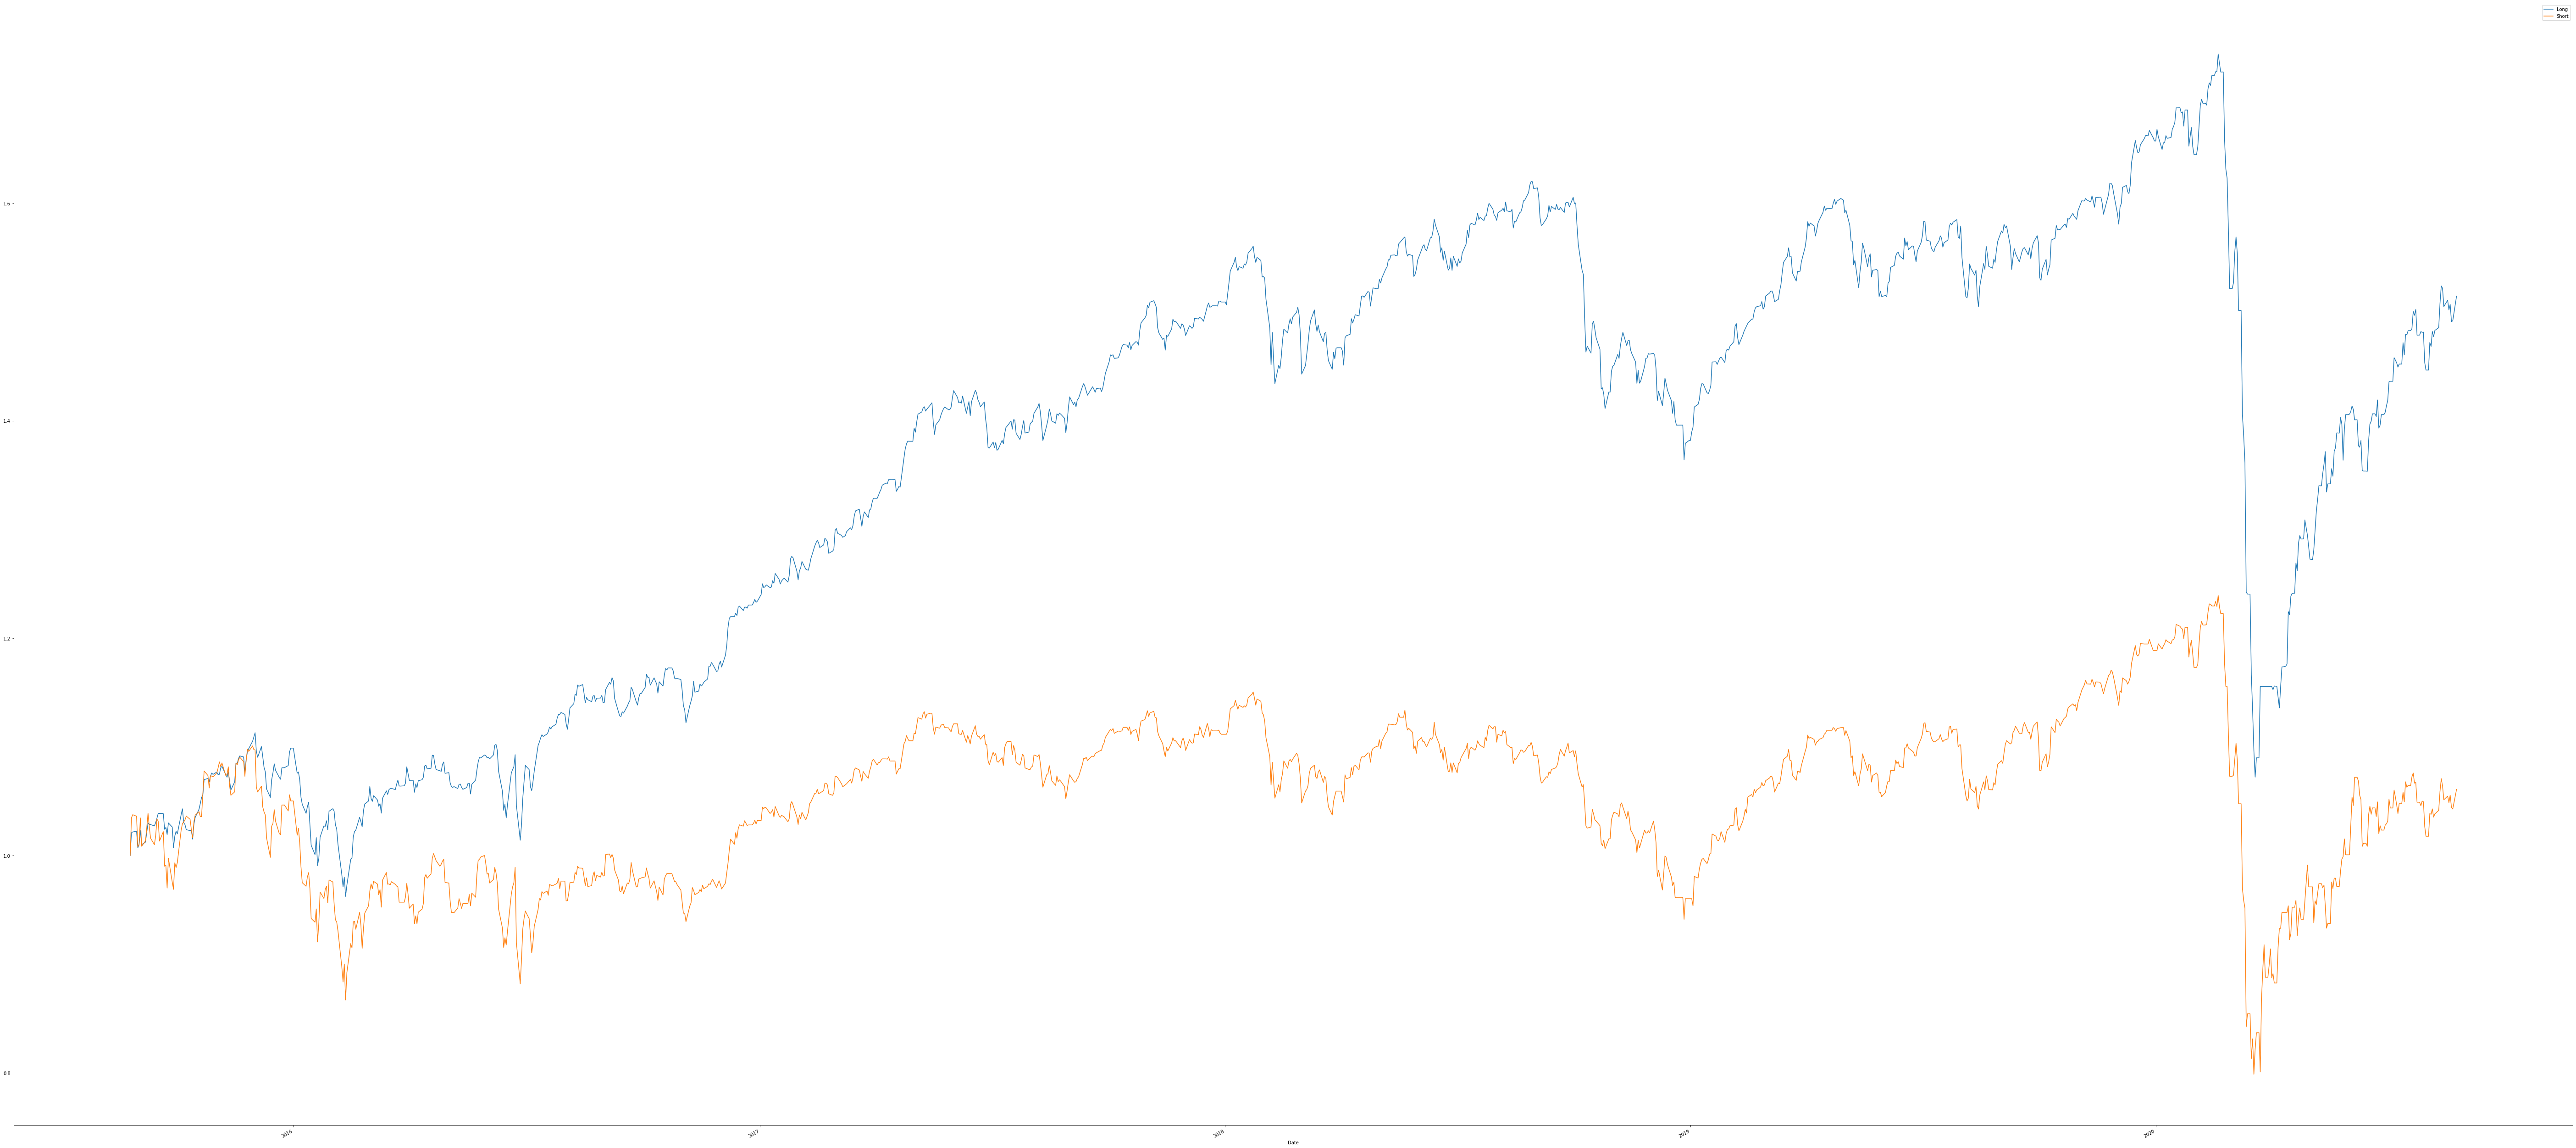

In [10]:
## Long/ Short Side Plot
ew_eq_curve.plot(figsize=(100,50), legend=True)
plt.show()
plt.close()

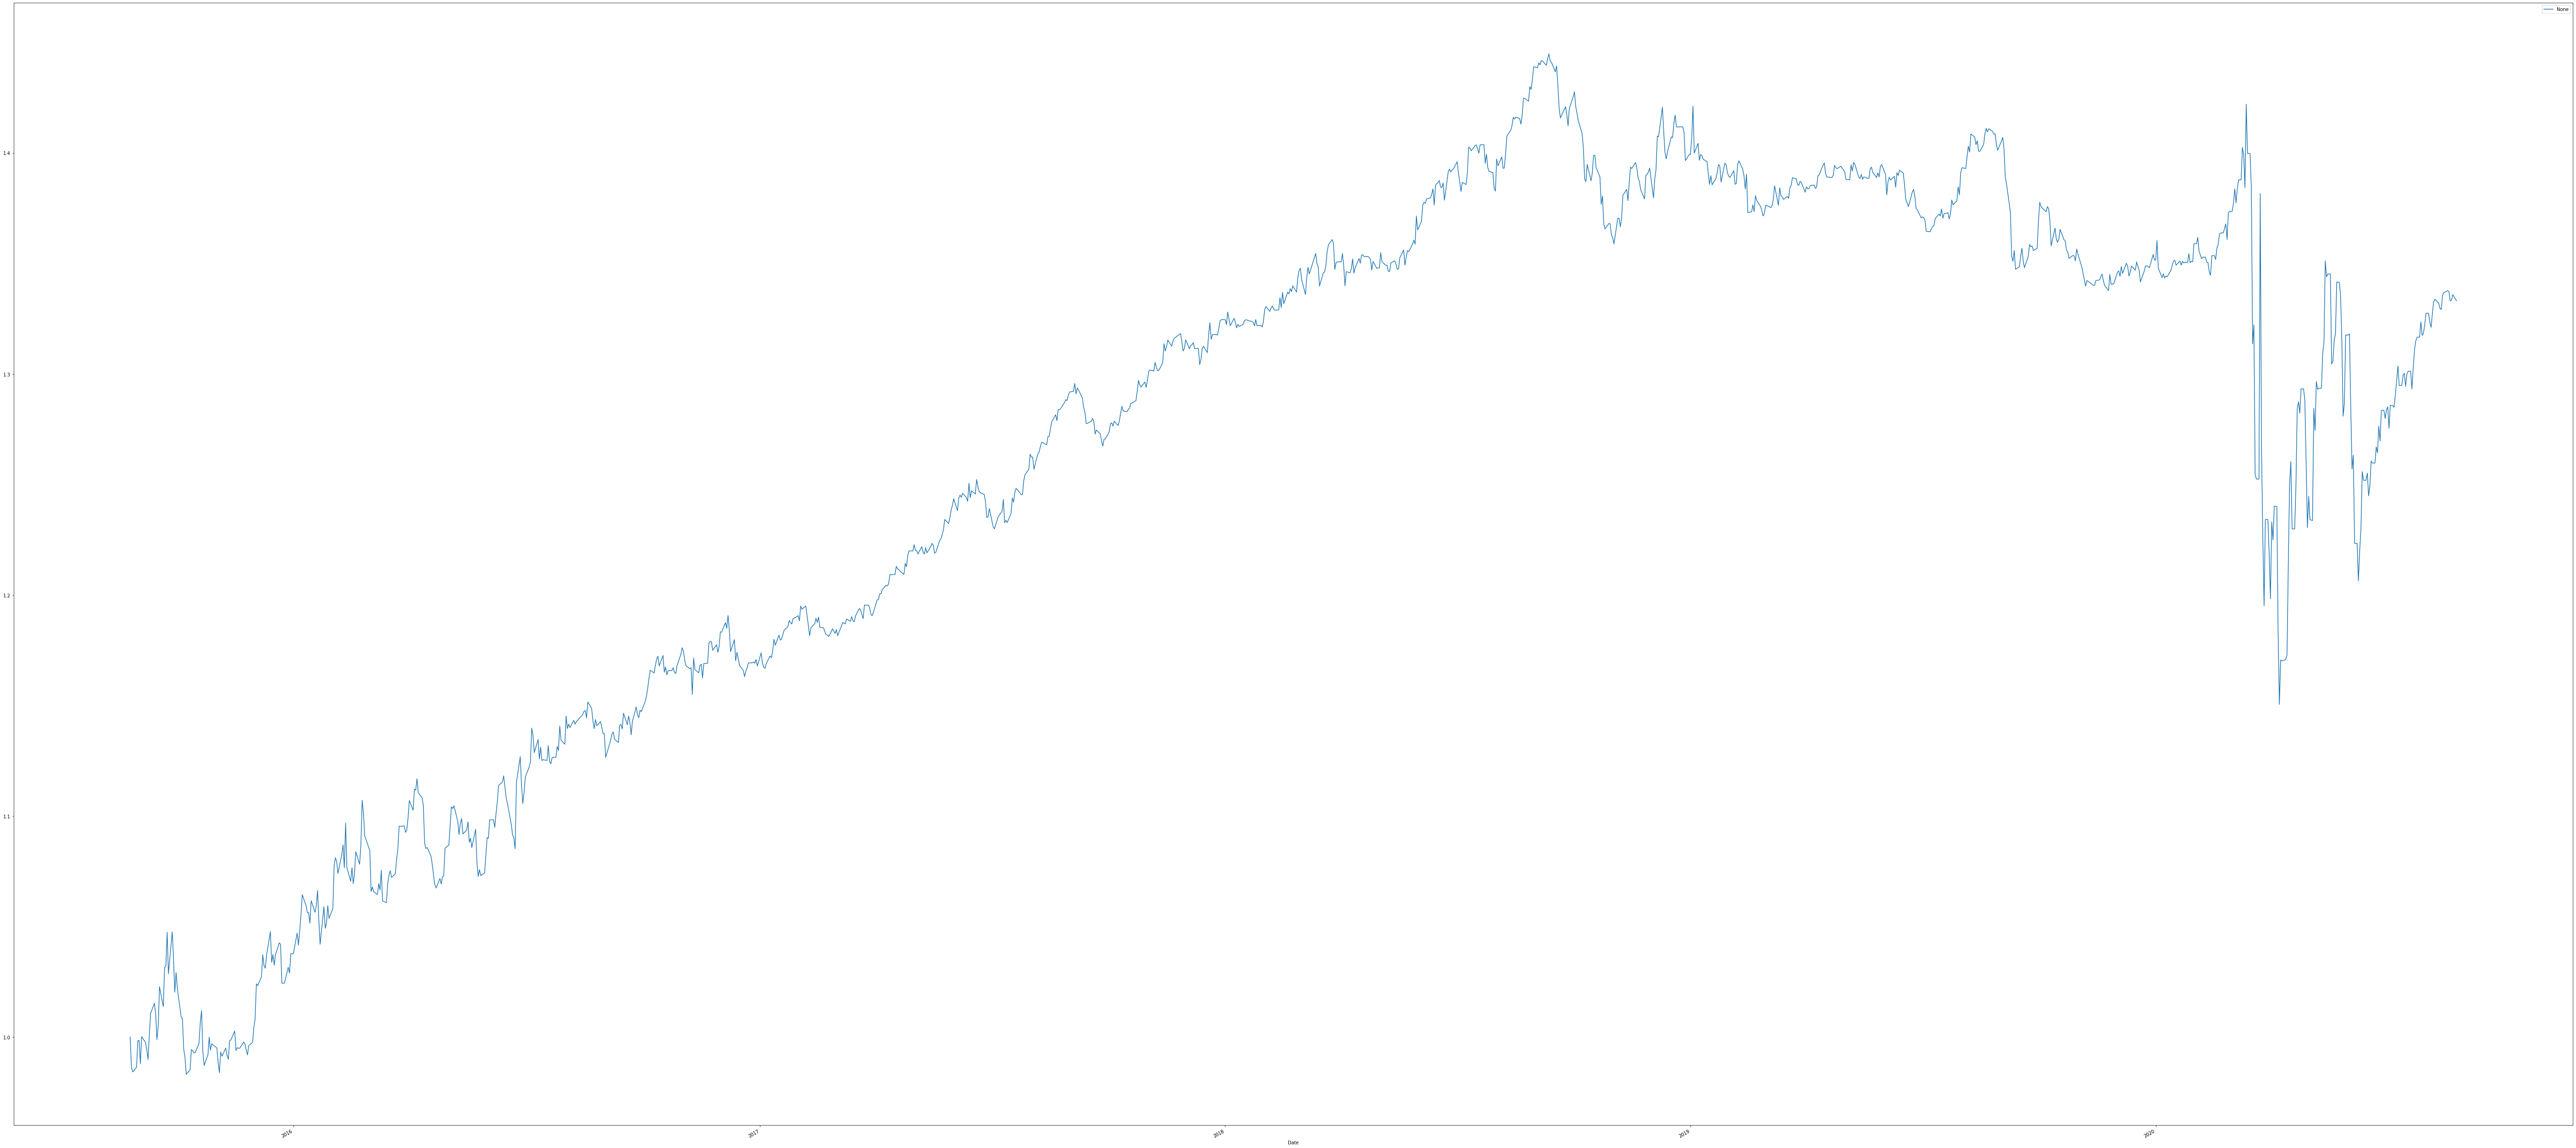

In [11]:
## combined PnL

combined_PnL = (port_ret['Long'] - port_ret['Short'] + 1).cumprod()
combined_PnL.plot(figsize=(100,50), legend=True)

plt.show()
plt.close()

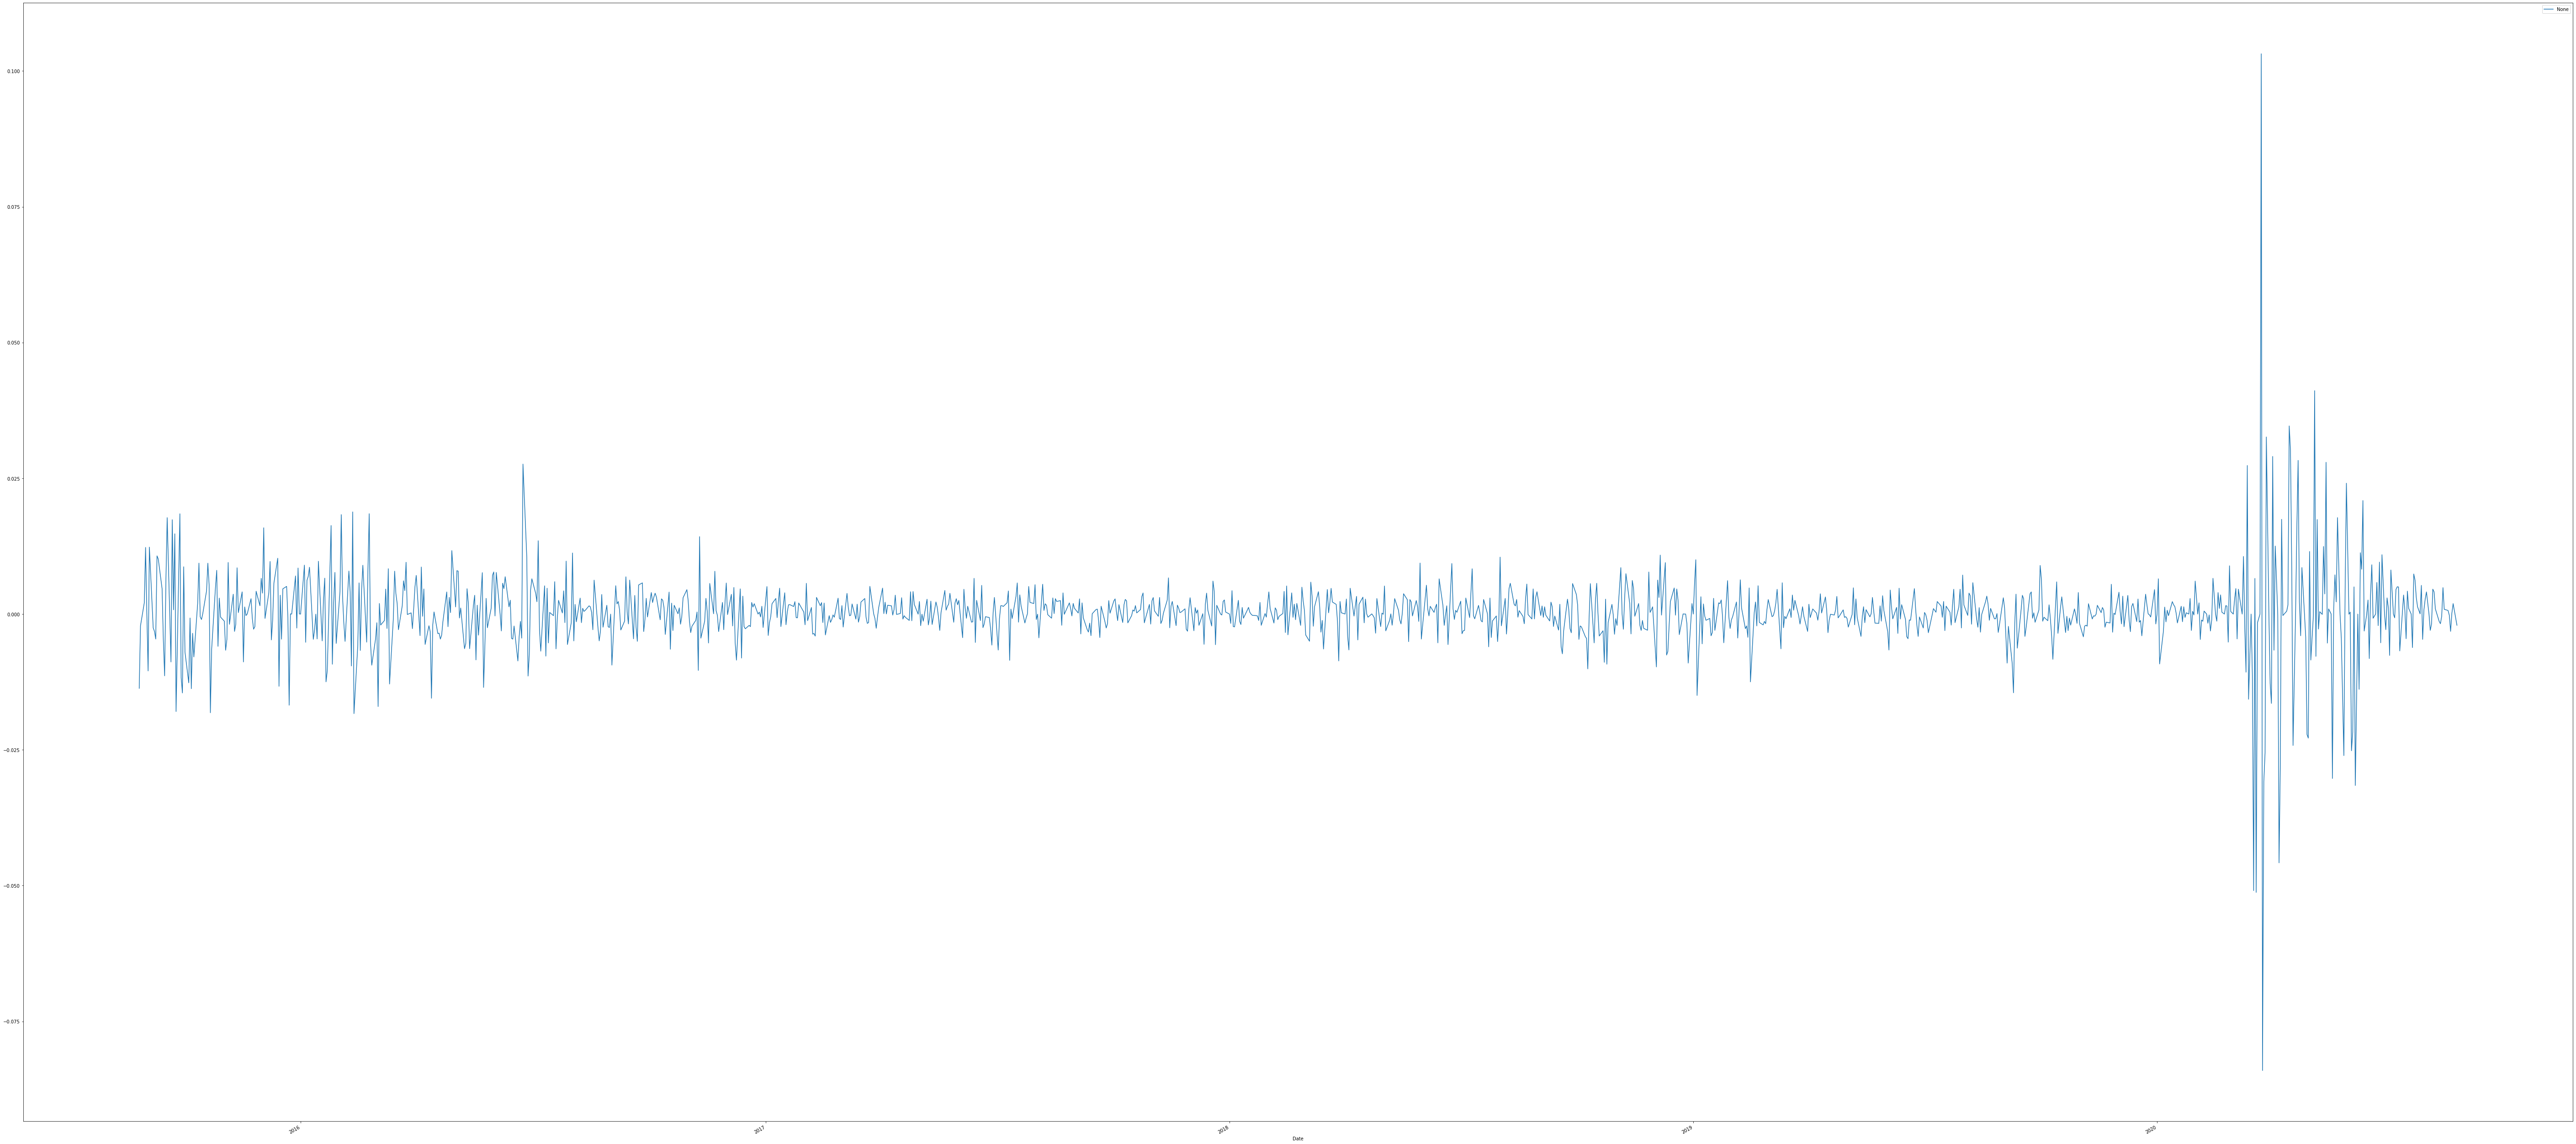

Ending Equity/ Profitability
Date
2020-08-24    1.333157
dtype: float64
count    1331.000000
mean        0.000242
std         0.007260
min        -0.084049
25%        -0.001942
50%         0.000056
75%         0.002622
max         0.103165
dtype: float64


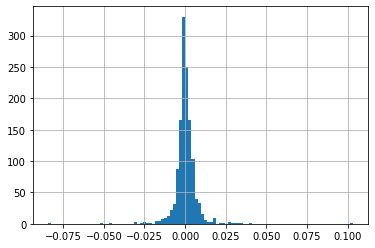

strategy alpha beta
                            OLS Regression Results                            
Dep. Variable:                      p   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     947.4
Date:                Tue, 25 Aug 2020   Prob (F-statistic):          1.66e-157
Time:                        10:48:49   Log-Likelihood:                 5025.8
No. Observations:                1331   AIC:                        -1.005e+04
Df Residuals:                    1329   BIC:                        -1.004e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000

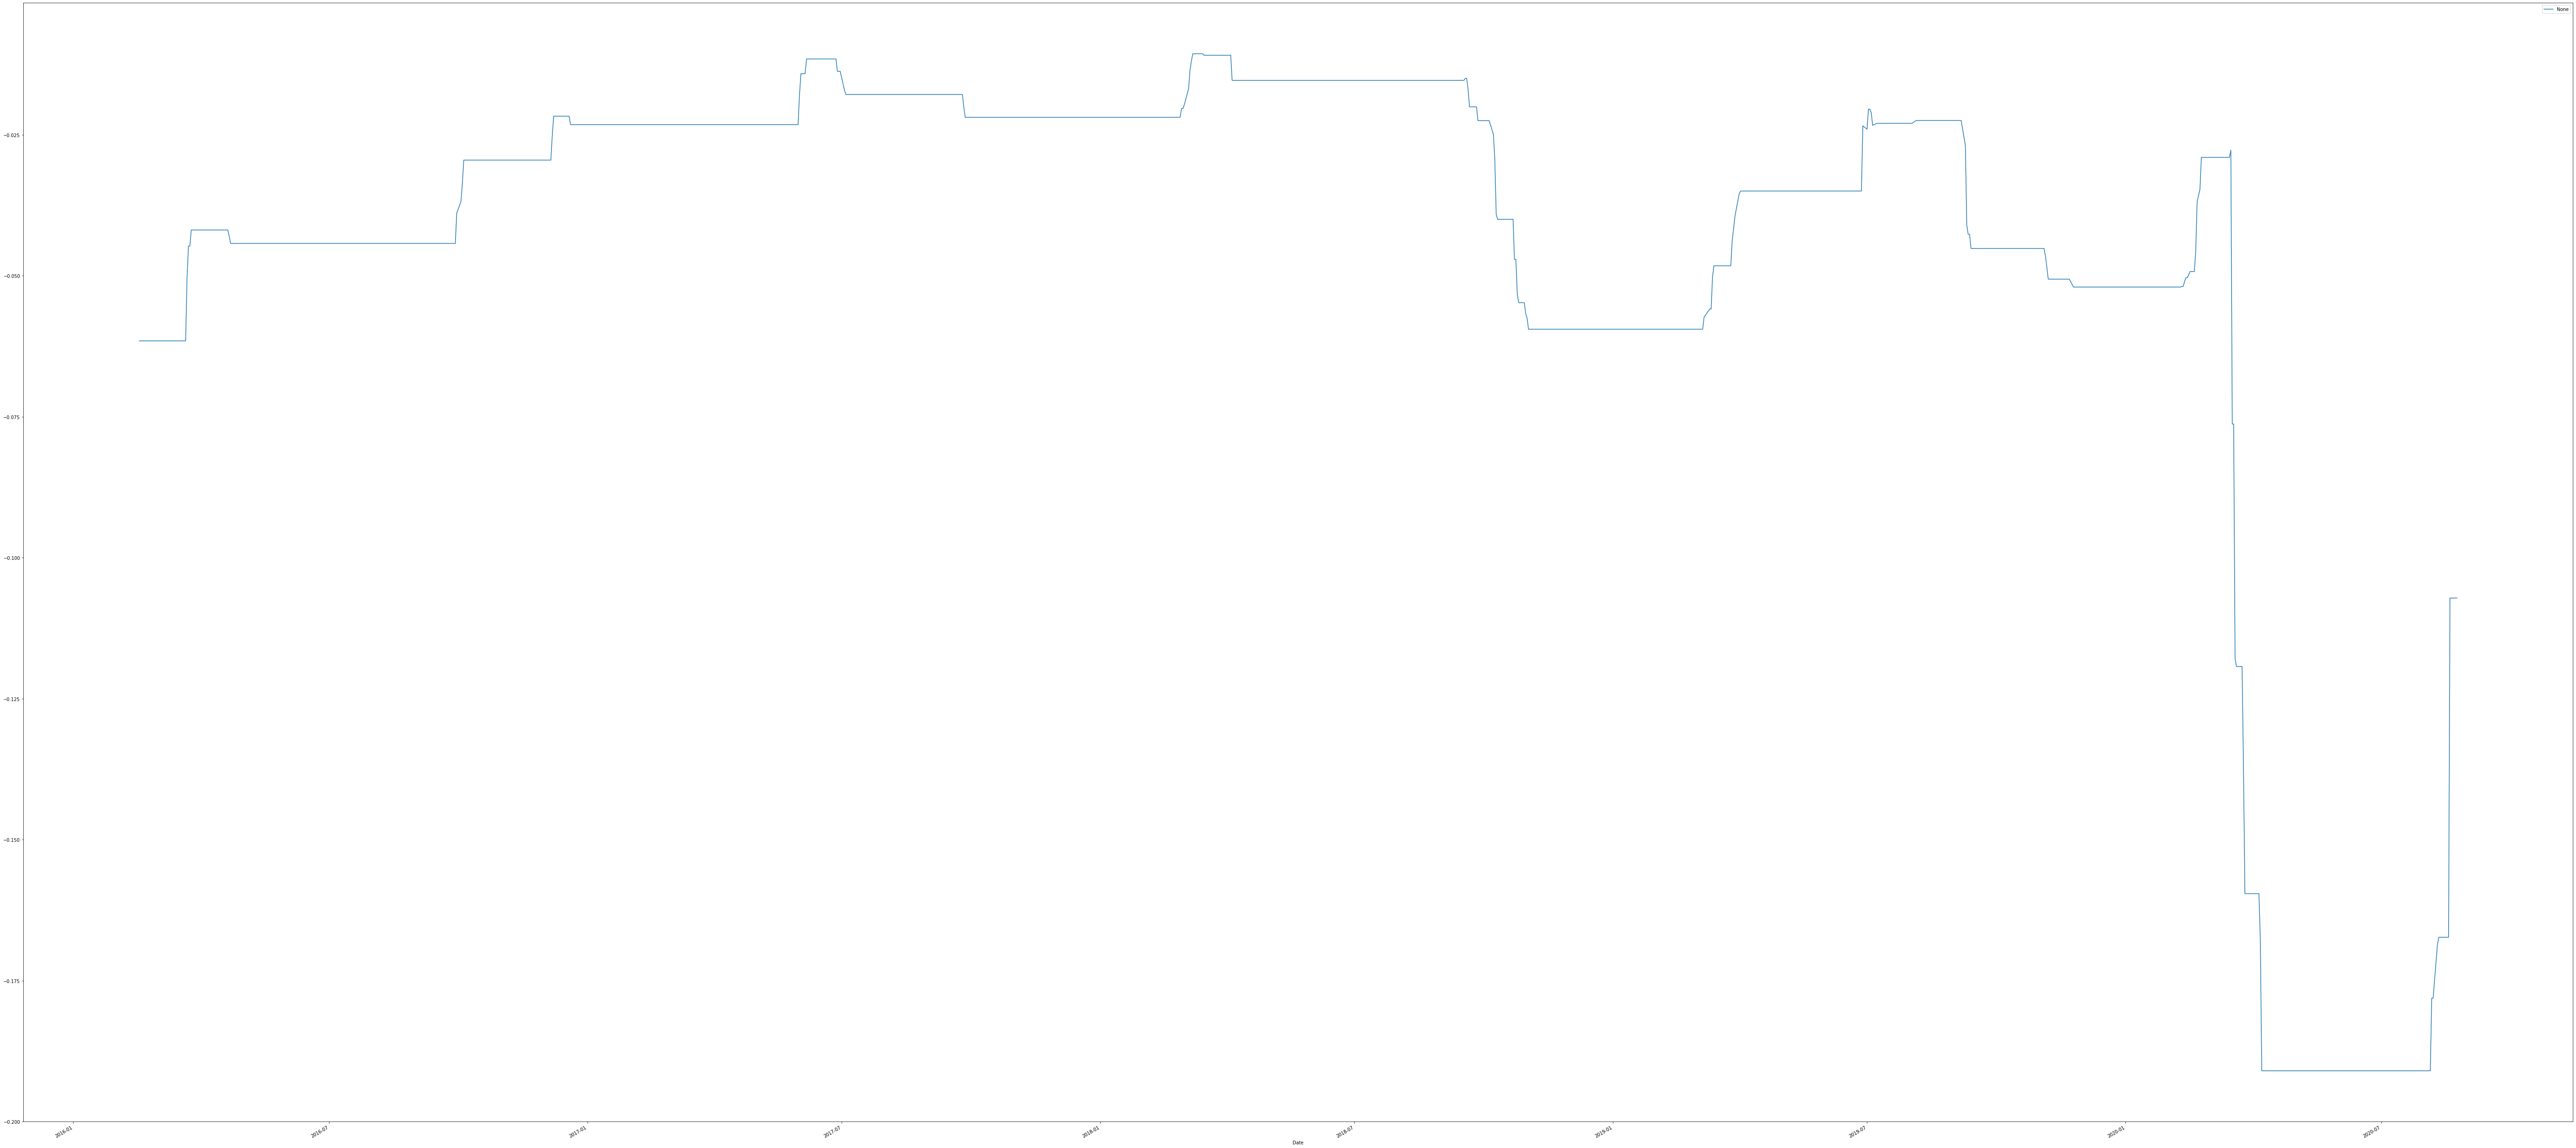

max dd: -0.19098513401514206
IR
Date
2015-12-31         NaN
2016-12-31   -0.499633
2017-12-31    9.658559
2018-12-31    2.016951
2019-12-31    6.217453
2020-12-31   -6.395489
Freq: A-DEC, dtype: float64
2.1995682518216038


Profit       1.333157
Alpha        0.000287
Beta        -0.426937
Daily Vol    0.007260
MaxDD       -0.190985
IR           2.199568
dtype: float64

In [12]:
performance_analysis(combined_PnL, (port_ret['Short'] + 1).cumprod())

In [13]:
## what if we seperate the two trend trading rules, what the portfolio will look like?
signal_20_50 = df_20MA - df_50MA
signal_50_150 = df_50MA - df_150MA


holdings_20_50 = np.sign(signal_20_50).replace(-1, 0)[today - pd.Timedelta('5Y'):]
holdings_50_150 = np.sign(signal_50_150).replace(-1, 0)[today - pd.Timedelta('5Y'):]

w_20_50 = (1/holdings_20_50.sum(axis=1)).replace([np.inf, -np.inf], 0)
w_50_150 = (1/holdings_50_150.sum(axis=1)).replace([np.inf, -np.inf], 0)


arr_transaction_cost = [0,0,0,0,transaction_cost]*(len(ret_df.index)//5) + [0]*(len(ret_df.index)%5)

#print((ret_df*holdings_20_50.mul(w_20_50, axis='index')).sum(axis=1).shape)

#print(holdings_20_50.shape)
# print(transaction_cost)
port_ret_20_50 = ((ret_df*holdings_20_50.mul(w, axis='index')).sum(axis=1) - ret_stoxx600 - pd.Series(arr_transaction_cost, index=w.index)).fillna(0)
port_ret_50_150 = ((ret_df*holdings_50_150.mul(w, axis='index')).sum(axis=1) - ret_stoxx600 - pd.Series(arr_transaction_cost, index=w.index)).fillna(0)
            
            
ew_eq_curve_20_50 = (port_ret_20_50+1).cumprod()
ew_eq_curve_50_150 = (port_ret_50_150+1).cumprod()

 #((ret_df*holdings_20_50.mul(w, axis='index')).sum(axis=1) - ret_stoxx600 - pd.Series(arr_transaction_cost, index=w.index)).rename('Long').to_frame()
# ((ret_df*holdings_50_150.mul(w, axis='index')).sum(axis=1) - ret_stoxx600 - pd.Series(arr_transaction_cost, index=w.index)).rename('Long').to_frame()



In [14]:
len([0,0,0,0,transaction_cost]*(len(ret_df.index)//5) + [0]*(len(ret_df.index)%5))

1332

In [15]:
ew_eq_curve_20_50_150 = ew_eq_curve_20_50.rename('20_50').to_frame()
ew_eq_curve_20_50_150['50_150'] = ew_eq_curve_50_150
ew_eq_curve_20_50_150["original"] = combined_PnL


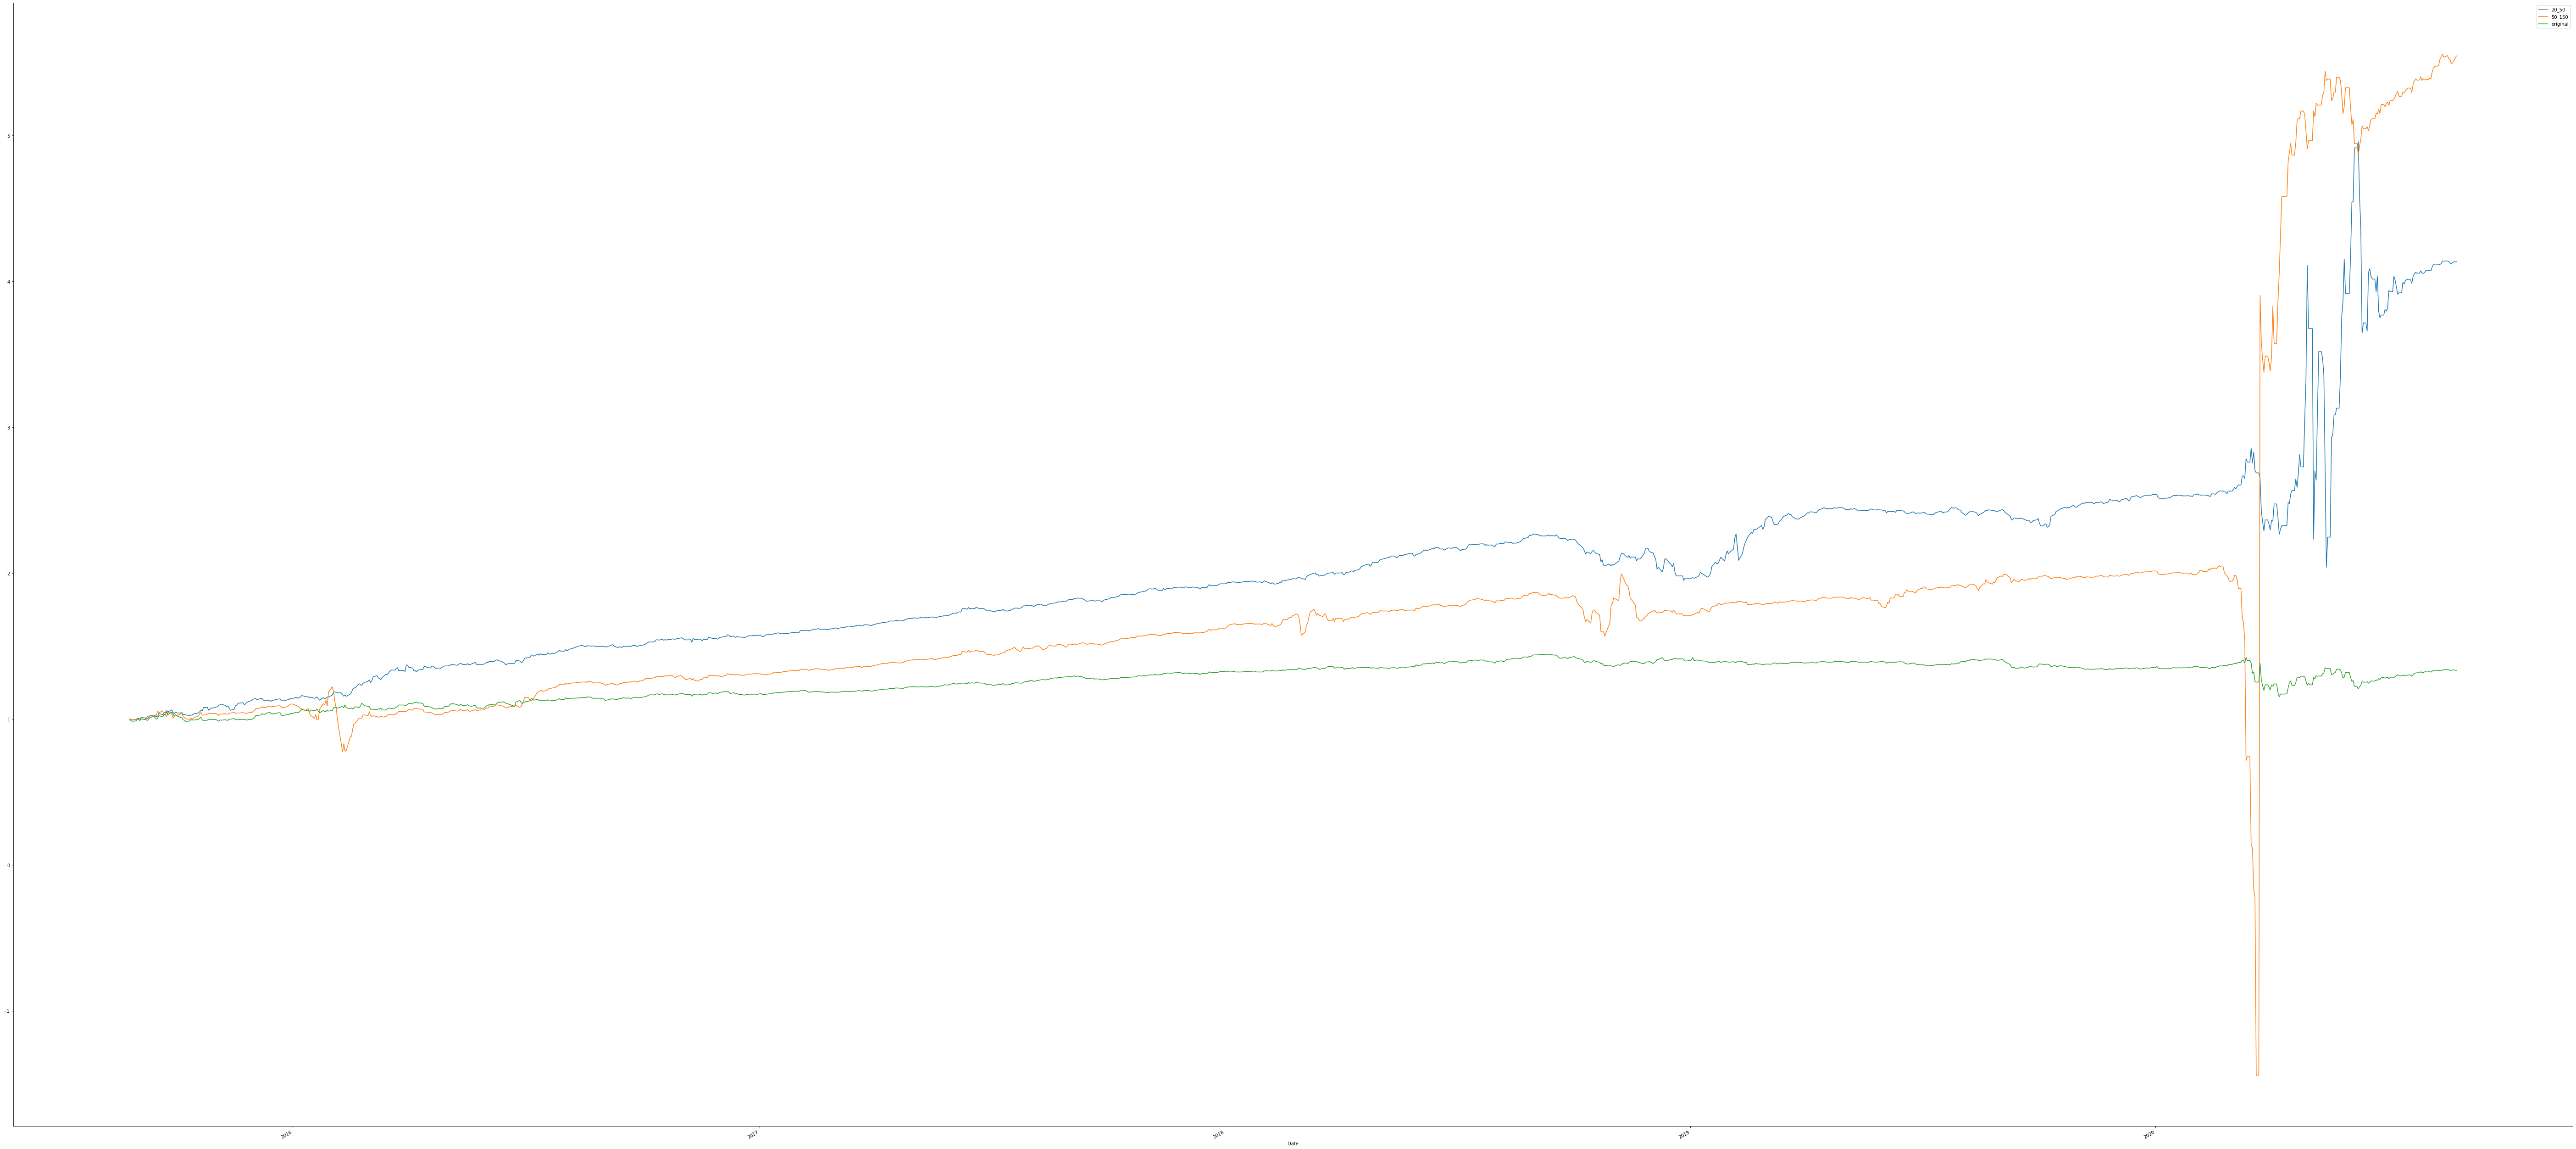

In [16]:
ew_eq_curve_20_50_150.plot(figsize=(100,50), legend=True)
plt.show()
plt.close()


We also discovered a most likely data quality issue, from yahoo finance
seems like two decimal points are missing for CRDA.L
We'll edit it for now and rerun previous analysis







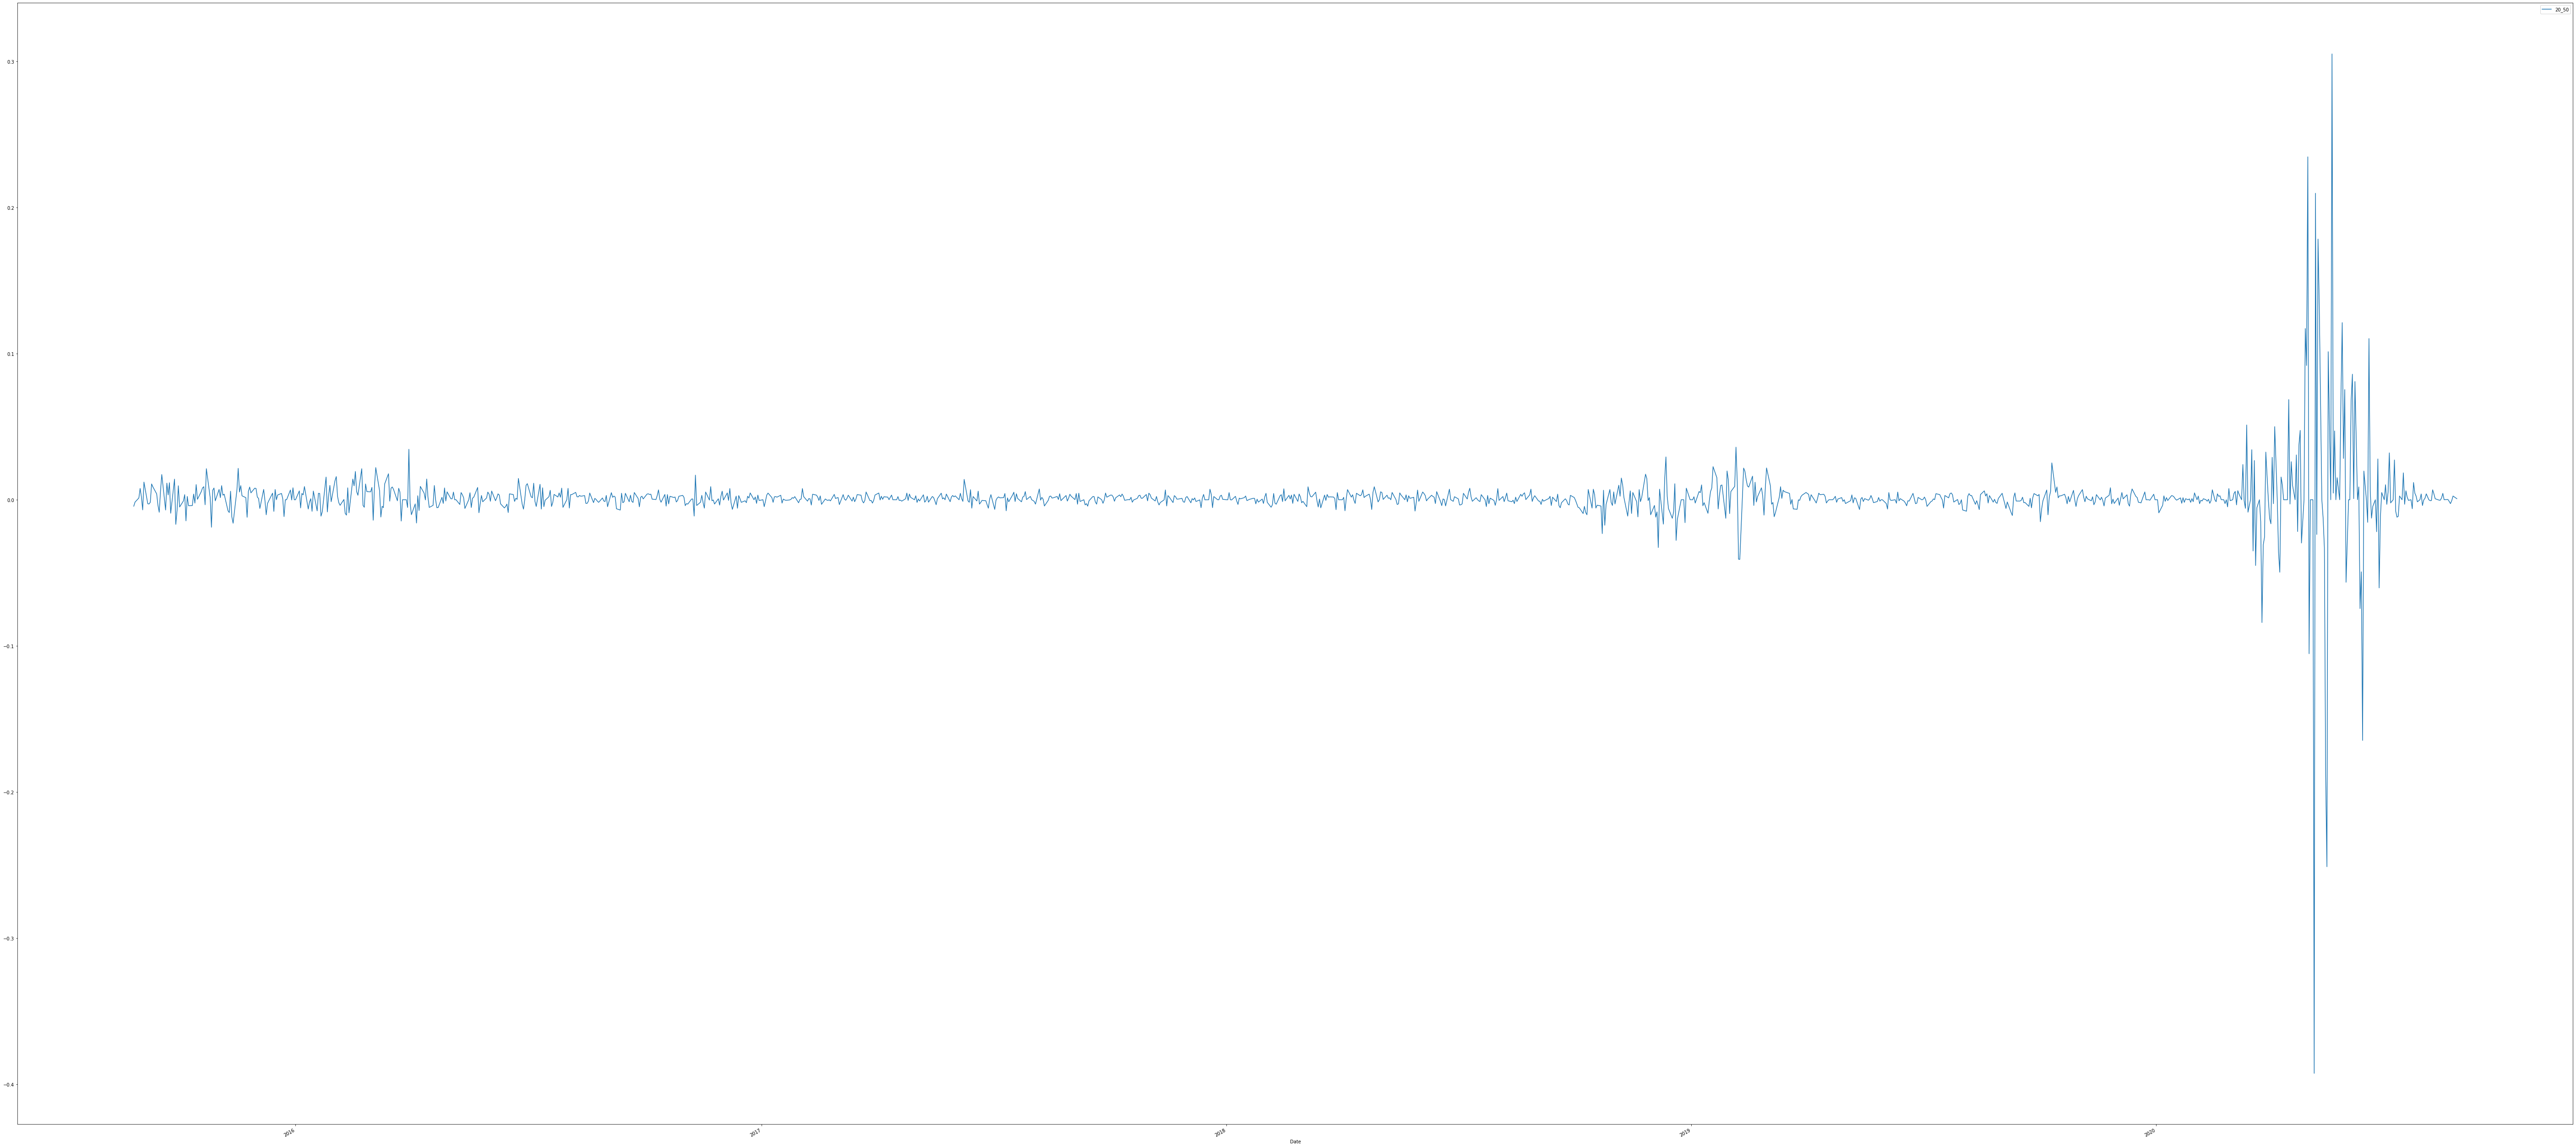

Ending Equity/ Profitability
Date
2020-08-24    4.13414
Name: 20_50, dtype: float64
count    1331.000000
mean        0.001355
std         0.023319
min        -0.392548
25%        -0.001671
50%         0.000483
75%         0.003496
max         0.305099
Name: 20_50, dtype: float64


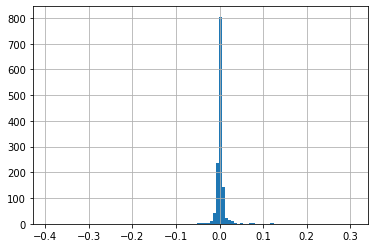

strategy alpha beta
                            OLS Regression Results                            
Dep. Variable:                      p   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     49.32
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           3.47e-12
Time:                        10:48:56   Log-Likelihood:                 3138.7
No. Observations:                1331   AIC:                            -6273.
Df Residuals:                    1329   BIC:                            -6263.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013      0.001

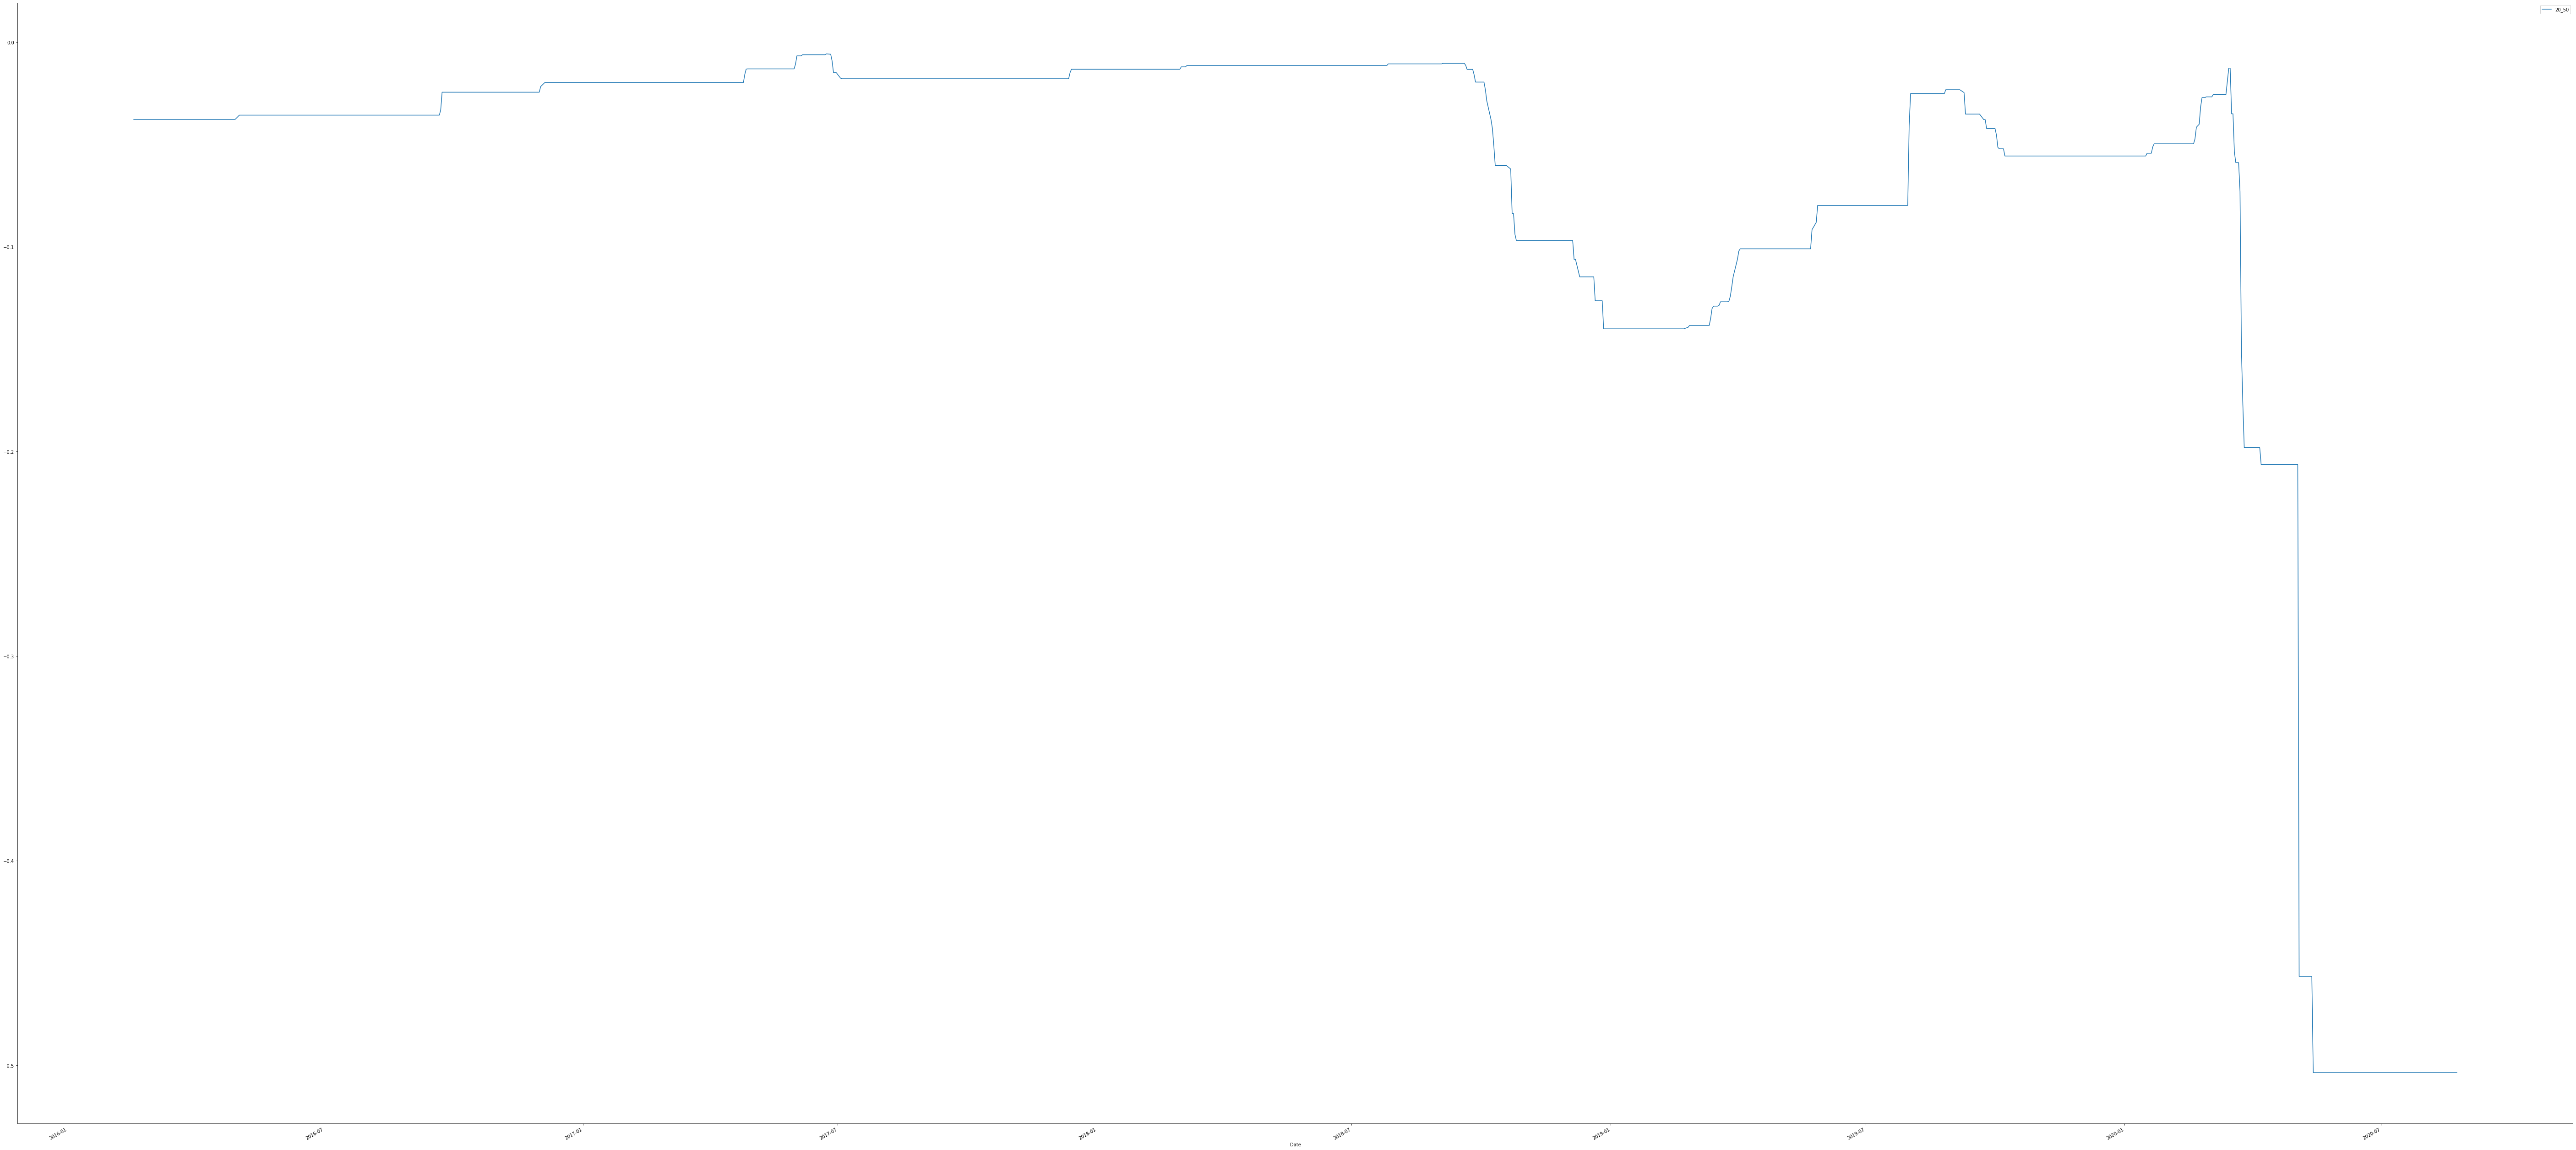

max dd: -0.5035601598192214
IR
Date
2015-12-31         NaN
2016-12-31    2.059087
2017-12-31    7.865311
2018-12-31    2.563292
2019-12-31    2.534007
2020-12-31    0.180554
Freq: A-DEC, dtype: float64
3.040449951060988


Profit       4.134140
Alpha        0.001313
Beta         0.402111
Daily Vol    0.023319
MaxDD       -0.503560
IR           3.040450
dtype: float64

In [17]:
performance_analysis(ew_eq_curve_20_50_150['20_50'], (port_ret['Short'] + 1).cumprod())


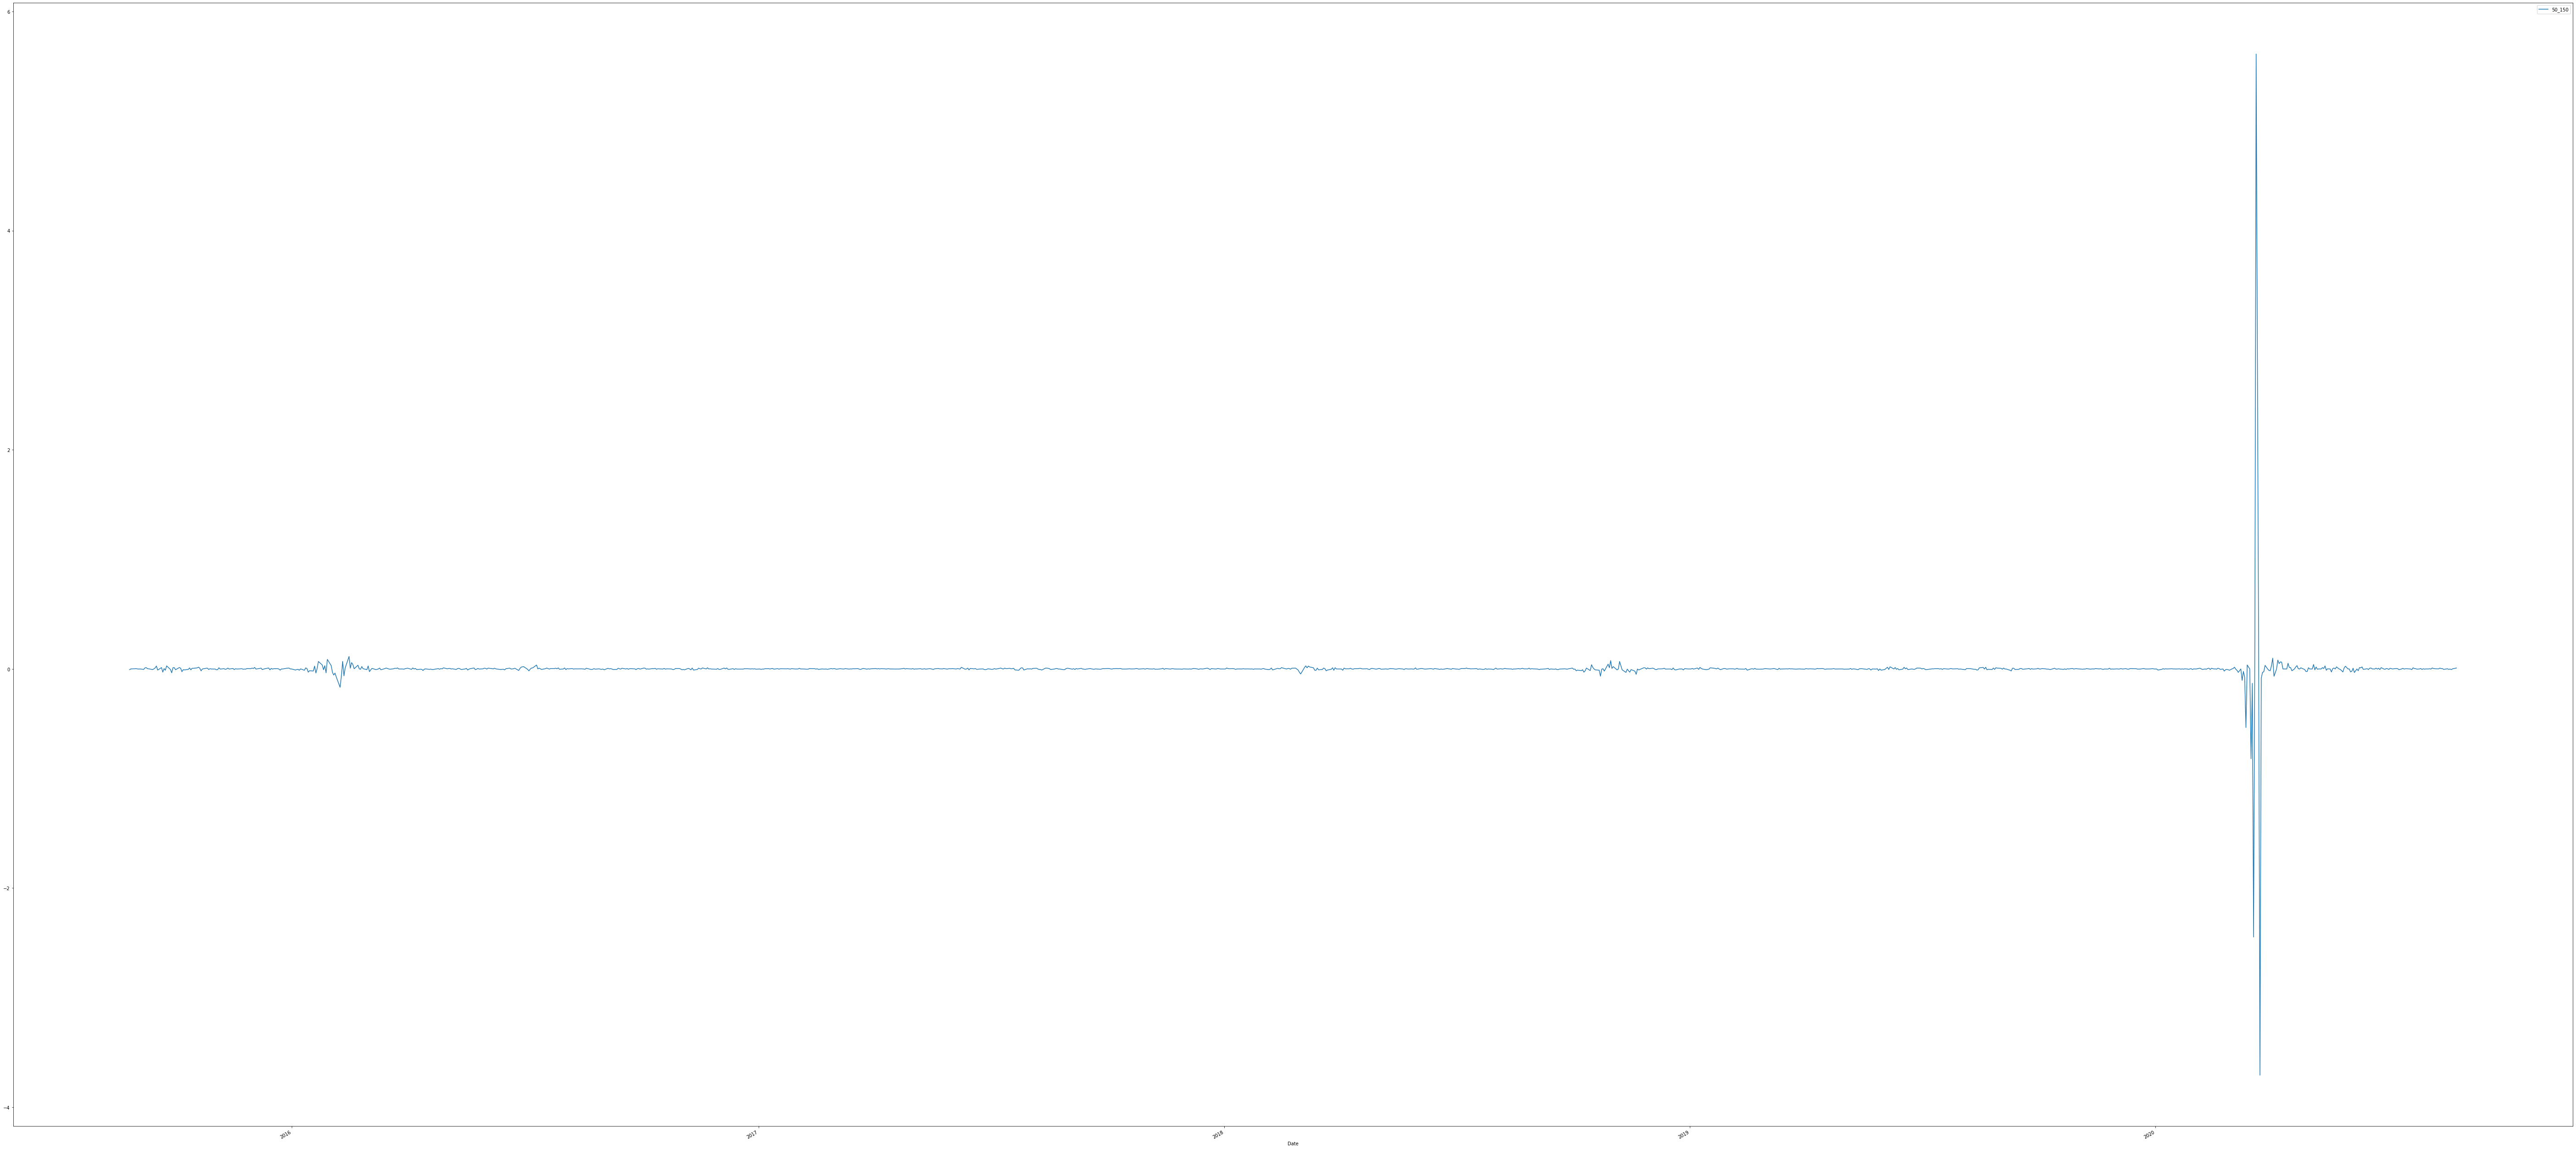

Ending Equity/ Profitability
Date
2020-08-24    5.543769
Name: 50_150, dtype: float64
count    1331.000000
mean       -0.000598
std         0.198725
min        -3.707427
25%        -0.001914
50%         0.000295
75%         0.003387
max         5.612121
Name: 50_150, dtype: float64


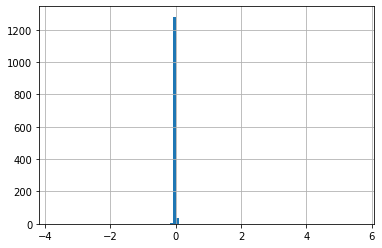

strategy alpha beta
                            OLS Regression Results                            
Dep. Variable:                      p   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     41.80
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           1.42e-10
Time:                        10:49:01   Log-Likelihood:                 283.18
No. Observations:                1331   AIC:                            -562.4
Df Residuals:                    1329   BIC:                            -552.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.005

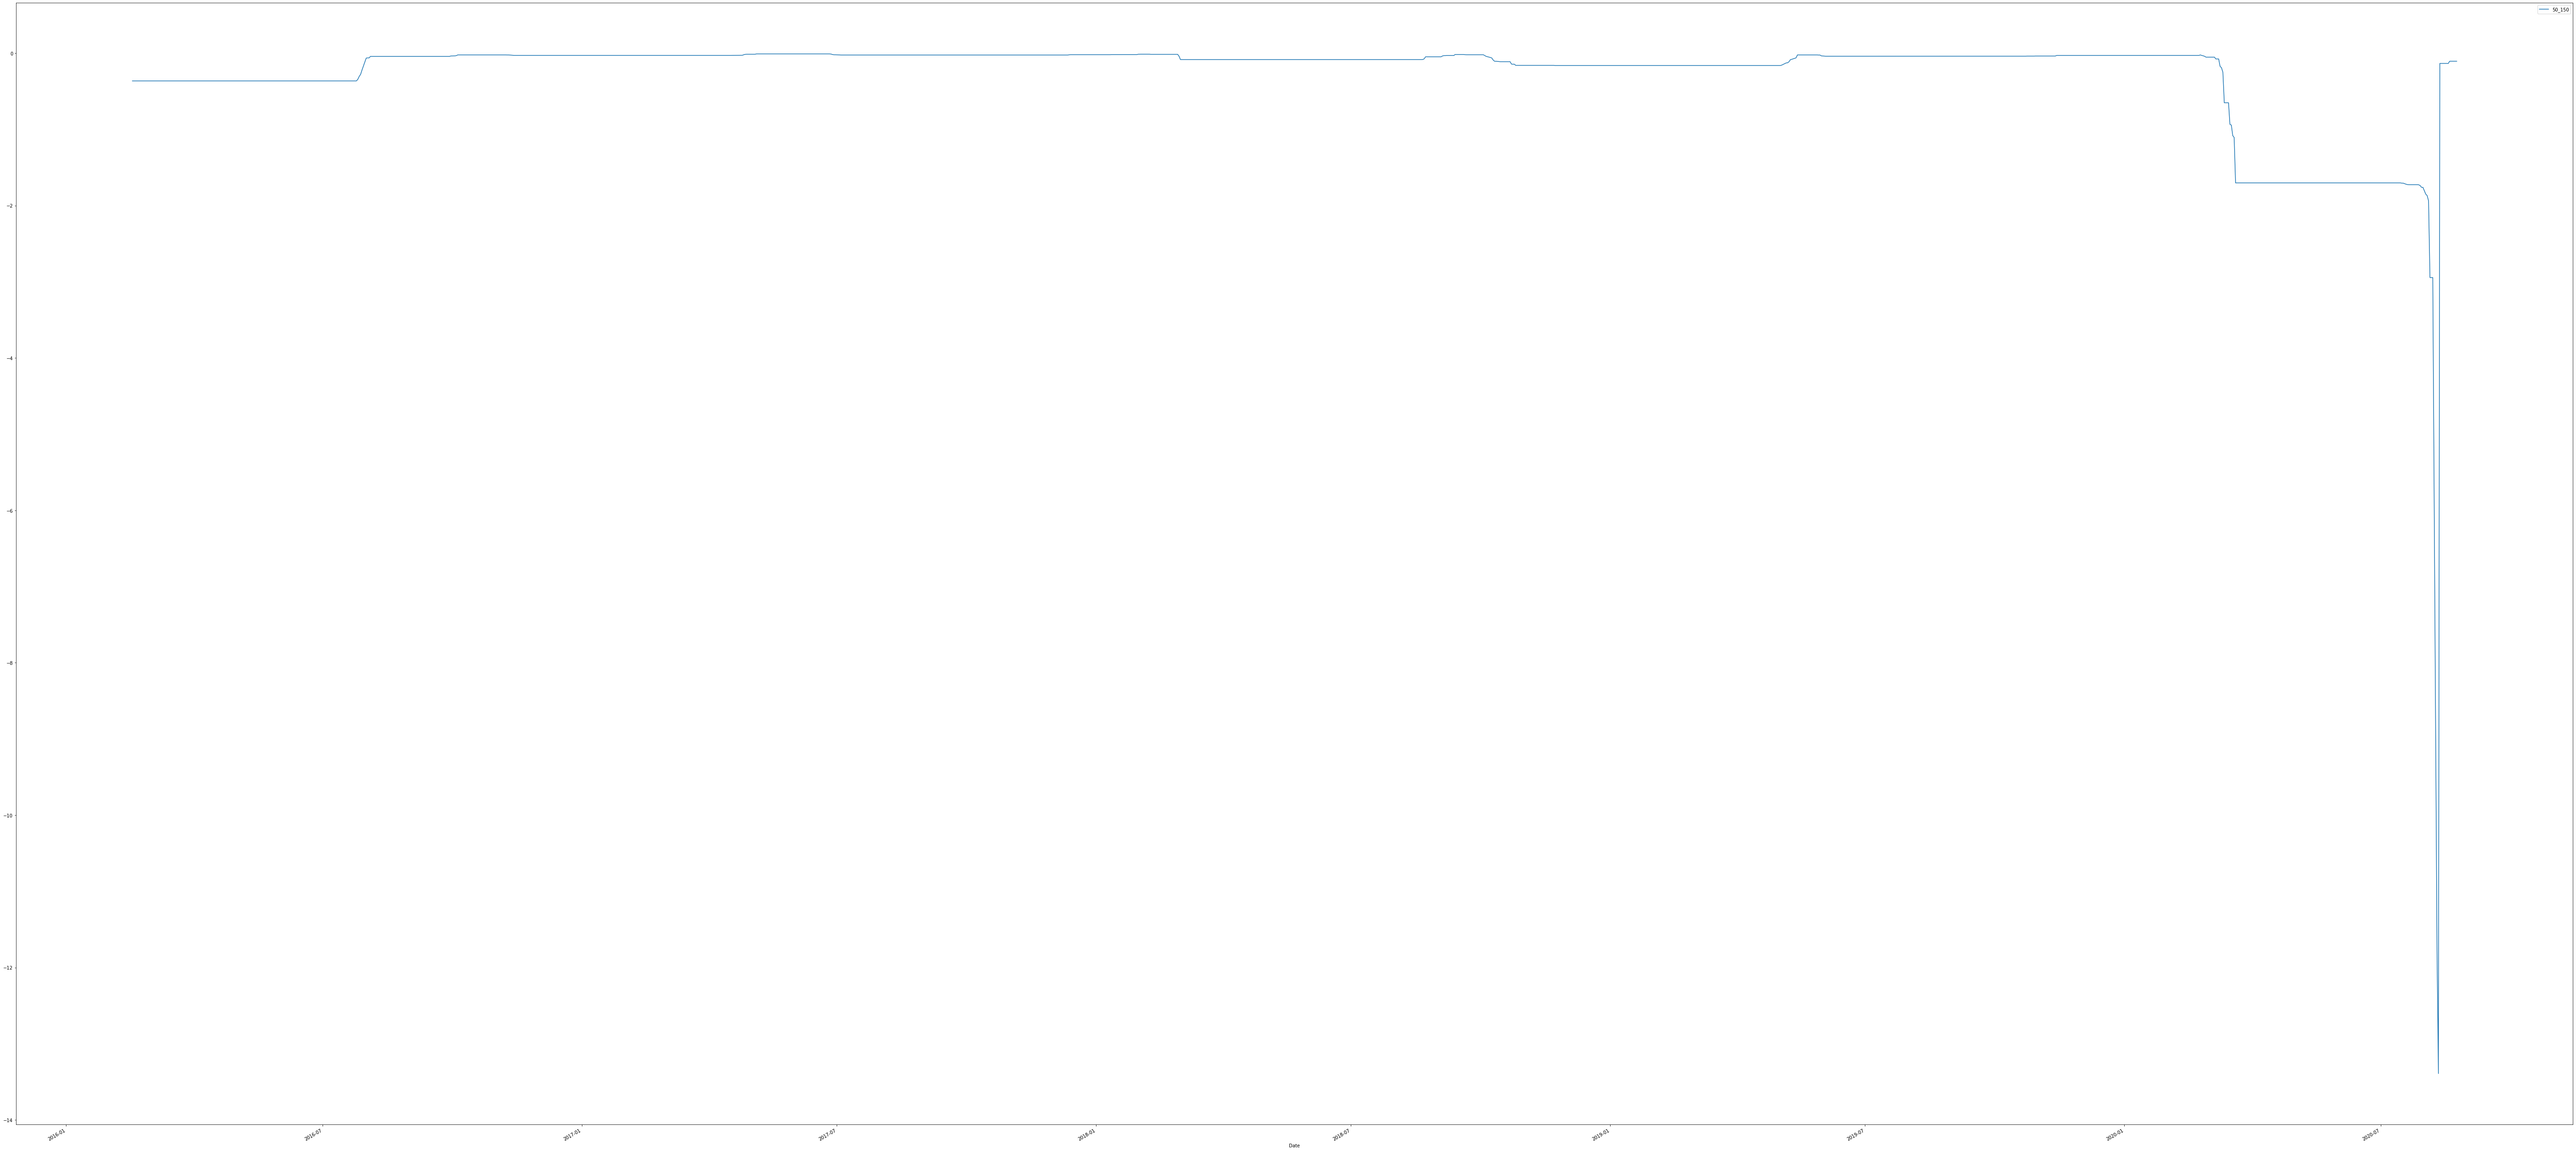

max dd: -13.391971686732123
IR
Date
2015-12-31         NaN
2016-12-31    2.099867
2017-12-31    2.423140
2018-12-31    2.521298
2019-12-31    3.811220
2020-12-31   -0.068654
Freq: A-DEC, dtype: float64
2.1573742162856275


Profit        5.543769
Alpha        -0.000931
Beta          3.163391
Daily Vol     0.198725
MaxDD       -13.391972
IR            2.157374
dtype: float64

In [18]:
performance_analysis(ew_eq_curve_20_50_150['50_150'], (port_ret['Short'] + 1).cumprod())

In [19]:
sep_signal_ret = port_ret_20_50.rename('20_50').to_frame()
sep_signal_ret['50_150'] = port_ret_50_150

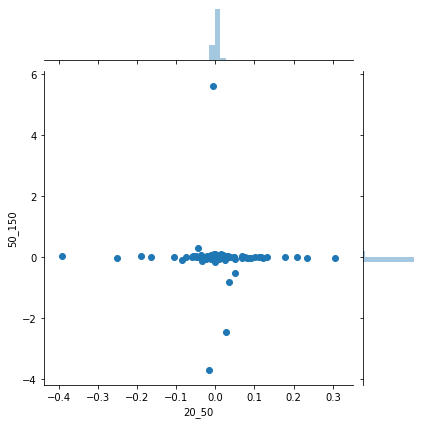

In [20]:
## The returns of the trading are plagued by outliers
sns.jointplot(sep_signal_ret['20_50'],sep_signal_ret['50_150'])

In [21]:
## Can remove the outliers by winsorizing 
sep_signal_ret = pd.DataFrame(mstats.winsorize(sep_signal_ret, [0.05, 0.05]), index=sep_signal_ret.index, columns=sep_signal_ret.columns)

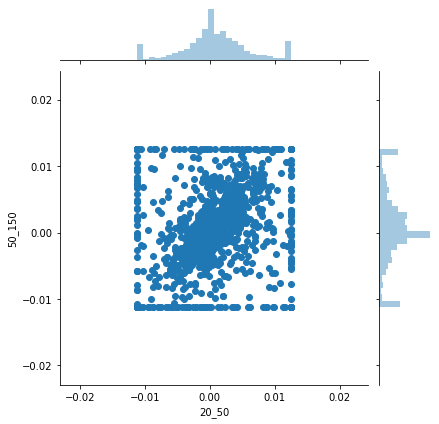

In [22]:
sns.jointplot(sep_signal_ret['20_50'],sep_signal_ret['50_150'])

In [23]:
sep_signal_ret.corr()

20_50   50_150
20_50   1.00000  0.21993
50_150  0.21993  1.00000

In [24]:
def compute_MV_weights(cov_m):
    inv_covar = np.linalg.inv(cov_m)
    u = np.ones(len(cov_m))
    return np.dot(inv_covar, u) / np.dot(u, np.dot(inv_covar, u))

In [25]:
## adjust by price volatility, so big moves of slow movers weight more than big moves of big movers
std_df = ret_df.rolling(60).std()
price_vol = df*std_df

In [26]:
## try to build different portfolios to see if there's improvement with different weighting scheme


signal_20_50 = df_20MA - df_50MA
signal_50_150 = df_50MA -df_150MA

norm_signal_20_50 = ((signal_20_50)/price_vol).replace([np.inf, -np.inf, np.nan],0)
norm_signal_50_150 = ((signal_50_150)/price_vol).replace([np.inf, -np.inf, np.nan],0)

## we can weight the two signals by inversing the covariance matrix of the seperated portfolio returns, will ignore insample calculation for now


w_trading_rules = compute_MV_weights(sep_signal_ret.cov())
w_trading_rules

array([0.52761922, 0.47238078])

In [27]:
combined_signal = norm_signal_20_50*w_trading_rules[0] + norm_signal_50_150*w_trading_rules[1]

In [28]:
combined_signal.describe()

0GRX.IL      0GWL.IL      0GZV.IL      0H13.IL      0H7O.IL  \
count  1593.000000  1593.000000  1593.000000  1593.000000  1593.000000   
mean      0.859713     0.415778    -0.360419     0.825291    -0.347168   
std       1.818852     2.852728     2.944243     2.561925     2.497121   
min      -4.497117   -10.033357    -8.990353    -5.076172   -10.758232   
25%       0.000000    -1.218983    -2.098862    -0.616202    -1.434842   
50%       0.885606     0.000000     0.000000     0.000000     0.000000   
75%       2.184243     2.113745     1.327468     2.116468     0.758369   
max       5.602848     7.635163     7.280363     9.783513     5.421078   

           0HAU.IL      0HBT.IL      0IAH.IL      0IKJ.IL      0IXZ.IL  ...  \
count  1593.000000  1593.000000  1593.000000  1593.000000  1593.000000  ...   
mean      1.410677     0.182673     0.249930    -0.373173    -0.524607  ...   
std       2.468466     2.423913     1.937347     2.406870     2.476266  ...   
min      -3.894897    -6.377642    -9.161969    -7.013262    -7.488884  ...   
25%       0.000000    -1.271501    -0.457570    -1.828730    -2.232253  ...   
50%       0.844268     0.000000     0.000000     0.000000     0.000000  ...   
75%       3.110297     1.642717     1.495078     0.370074     0.835316  ...   
max       8.352371     6.124037     4.174595     6.942946     5.322686  ...   

            VWS.CO       WDI.SG       WIB.BE       WKL.AS       WO6.BE  \
count  1593.000000  1593.000000  1593.000000  1593.000000  1593.000000   
mean      0.782672    -0.843505     0.385415     1.607516     1.954572   
std       2.285177    11.676184     2.035245     2.161205     5.662159   
min      -6.353855   -89.707036    -8.197273    -3.446139    -2.227563   
25%      -0.524828    -0.584806    -0.388198     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     1.042513     0.000000   
75%       2.614378     2.844464     1.368980     3.257110     0.324152   
max       6.238208     9.420133     5.359674     7.364500    42.878708   

             WPP.L        WTB.L       YAR.OL       ZAL.DE      ZFIN.SG  
count  1593.000000  1593.000000  1593.000000  1593.000000  1593.000000  
mean     -0.766874    -0.654488    -0.058909     0.446738     0.824676  
std       2.569361     1.904865     2.024865     2.613881     8.086621  
min     -10.292491    -8.858867    -5.535886   -10.479911    -4.888594  
25%      -2.041159    -1.866636    -1.244670     0.000000     0.000000  
50%       0.000000    -0.008310     0.000000     0.382565     0.000000  
75%       0.861500     0.366793     0.988377     2.137368     1.255531  
max       3.830323     3.215329     6.535801     5.865140   311.922207  

[8 rows x 379 columns]

In [29]:
def simple_ew_backtester(bt_signal_df, bt_ret_df, b_ret, rules=0, transaction_cost=transaction_cost):
    
    bt_signal_df = bt_signal_df.where(bt_signal_df < rules,np.inf)
    bt_signal_df = bt_signal_df.where(bt_signal_df > rules,np.nan)
    bt_signal_df = bt_signal_df.replace(np.inf,1).fillna(0)

    bt_holdings = bt_signal_df.shift(1)[today - pd.Timedelta('5Y'):]
    bt_w = (1/bt_holdings.sum(axis=1)).replace([np.inf, -np.inf], 0)


    arr_transaction_cost = [0,0,0,0,transaction_cost]*(len(ret_df.index)//5) + [0]*(len(ret_df.index)%5)
    
    
    
    bt_port_ret = (bt_ret_df*holdings.mul(bt_w, axis='index')).sum(axis=1) - b_ret - pd.Series(arr_transaction_cost, index=w.index)
    bt_ew_eq_curve = (bt_port_ret.fillna(0)+1).cumprod()
    

    return bt_port_ret, bt_ew_eq_curve
    
    
    
    
    

In [30]:
combined_ew_ret_0, combined_ew_eq_curve_0 = simple_ew_backtester(combined_signal, ret_df, ret_stoxx600, rules=0, transaction_cost=transaction_cost)
combined_ew_ret_1, combined_ew_eq_curve_1 = simple_ew_backtester(combined_signal, ret_df, ret_stoxx600, rules=1, transaction_cost=transaction_cost)
combined_ew_ret_2, combined_ew_eq_curve_2 = simple_ew_backtester(combined_signal, ret_df, ret_stoxx600, rules=2, transaction_cost=transaction_cost)

In [31]:

ew_eq_curve_20_50_150['ew_mv_signal_0'] = combined_ew_eq_curve_0
ew_eq_curve_20_50_150['ew_mv_signal_1'] = combined_ew_eq_curve_1
ew_eq_curve_20_50_150['ew_mv_signal_2'] = combined_ew_eq_curve_2

In [32]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #print(ret_df.loc['2020-03-16':].head(100).describe().T.sort_values('max', ascending=False))
    
    # print(ew_eq_curve_20_50_150.loc['2020-01-14':'2020-07-29'])
    # print(ret_df.loc['2020-03-18'].sort_values())
    # print(ret_df.loc[np.isclose(ret_df['KESKOB.HE'], 3.023567)]['KESKOB.HE'])
    # print(df.loc['2020-03-15':'2020-03-24']['BMRA'])
    # print(signal_20_50.loc['2020-03-15':'2020-03-24']['BMRA'])
    # print(holdings_20_50.loc['2020-03-15':'2020-03-24']['BMRA'])
    # print((ret_df*holdings_20_50.mul(w_20_50, axis='index')).loc['2020-03-13':'2020-03-24'].describe().T.sort_values('max', ascending=False)['max'].head(10))
    # print((ret_df*holdings_20_50.mul(w_20_50, axis='index')).loc['2020-03-15':'2020-03-24']['BMRA'])
    # print((ret_df*holdings_20_50.mul(w_20_50, axis='index')).loc['2020-03-15':'2020-03-24']['BMRA'])

    
    # print((ret_df*holdings_20_50.mul(w_20_50, axis='index')).loc['2020-07-14':'2020-07-29'].describe().T.sort_values('max', ascending=False)['max'].head(10))
    # print((ret_df*holdings_20_50.mul(w_20_50, axis='index')).loc['2020-07-14':'2020-07-29']['CRDA.L'])
    # print(df.loc['2020-07-14':'2020-07-29']['CRDA.L'])
    
    
    print((ret_df*holdings_50_150.mul(w_50_150, axis='index')).loc['2020-03-17':'2020-03-25'].describe().T.sort_values('min')['min'])
    pass

I2X2.SG            -0.002136
OSR.HA             -0.001956
0LC.MU             -0.001798
VMUK.L             -0.001650
PAPERPROD.NS       -0.001262
TPK.L              -0.001227
0O9Q.IL            -0.001142
42BA.HA            -0.001129
JD.L               -0.001095
VTY.L              -0.001086
UUEC.BE            -0.001069
BESI.AS            -0.001065
KESKOB.HE          -0.001058
U1B.MU             -0.001018
IFX.SG             -0.000999
TEP.PA             -0.000968
ING.PA             -0.000965
DSV.CO             -0.000962
HLMA.L             -0.000946
ICAD.PA            -0.000932
WO6.BE             -0.000873
RDW.L              -0.000868
6CO.SG             -0.000834
DLG.L              -0.000825
RTO.L              -0.000810
BDEV.L             -0.000805
SMT.L              -0.000787
4A91.BE            -0.000782
8FS.BE             -0.000768
DANSKE.CO          -0.000767
VALMT.HE           -0.000757
GAW.L              -0.000756
KRX.BE             -0.000737
UFG.SG             -0.000723
FGR.PA        

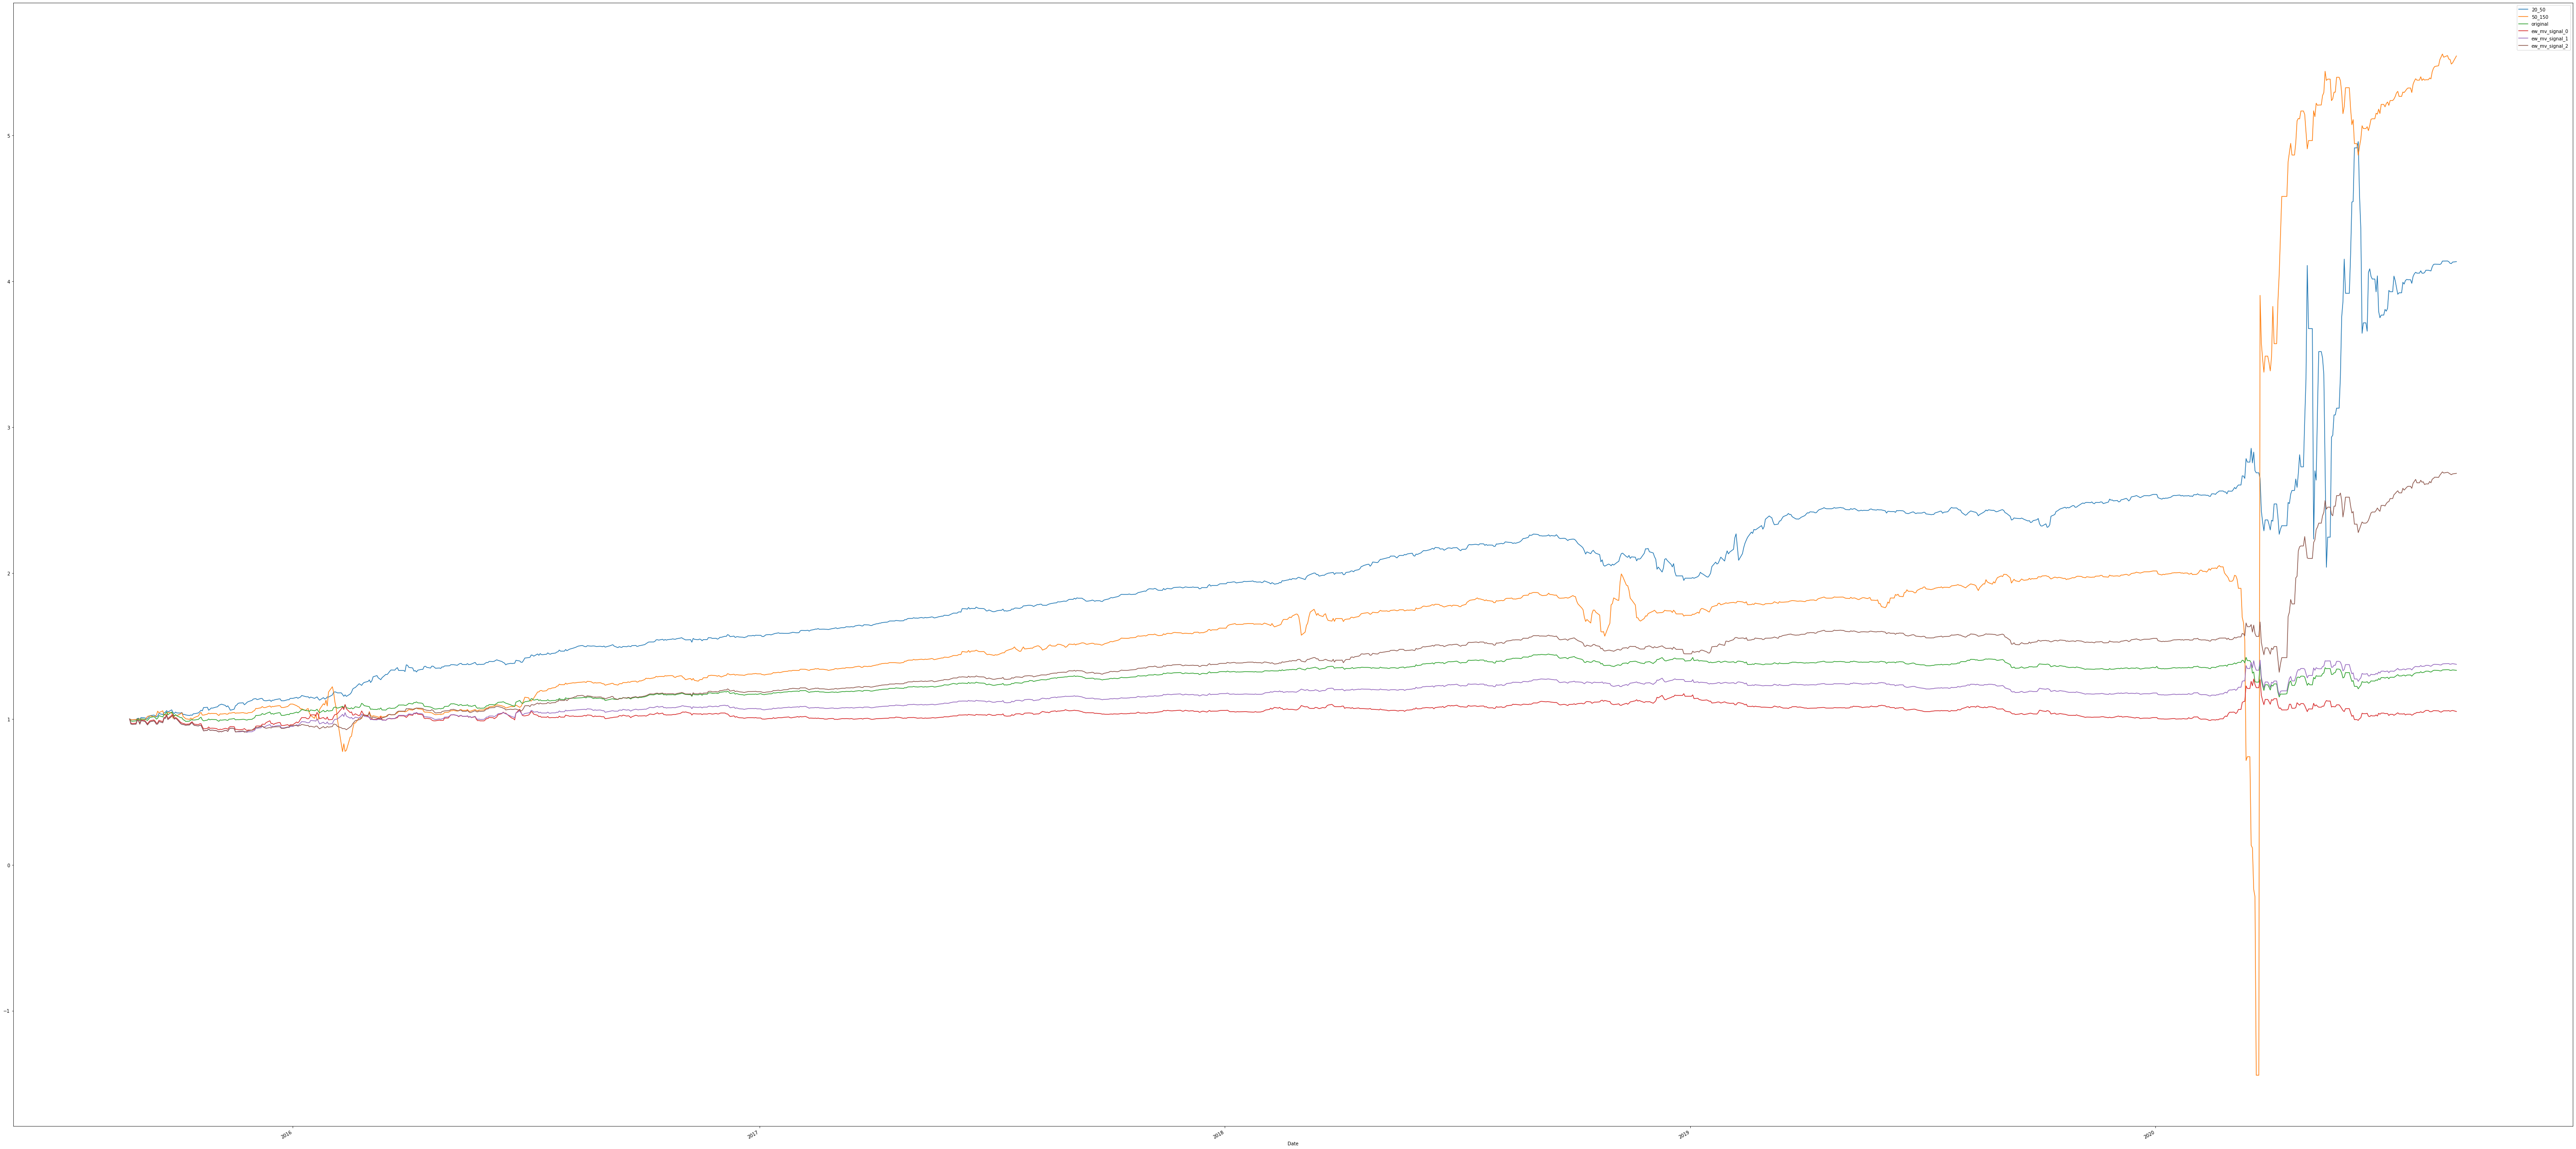

In [33]:
ew_eq_curve_20_50_150.plot(figsize=(100,50), legend=True)
plt.show()
plt.close()

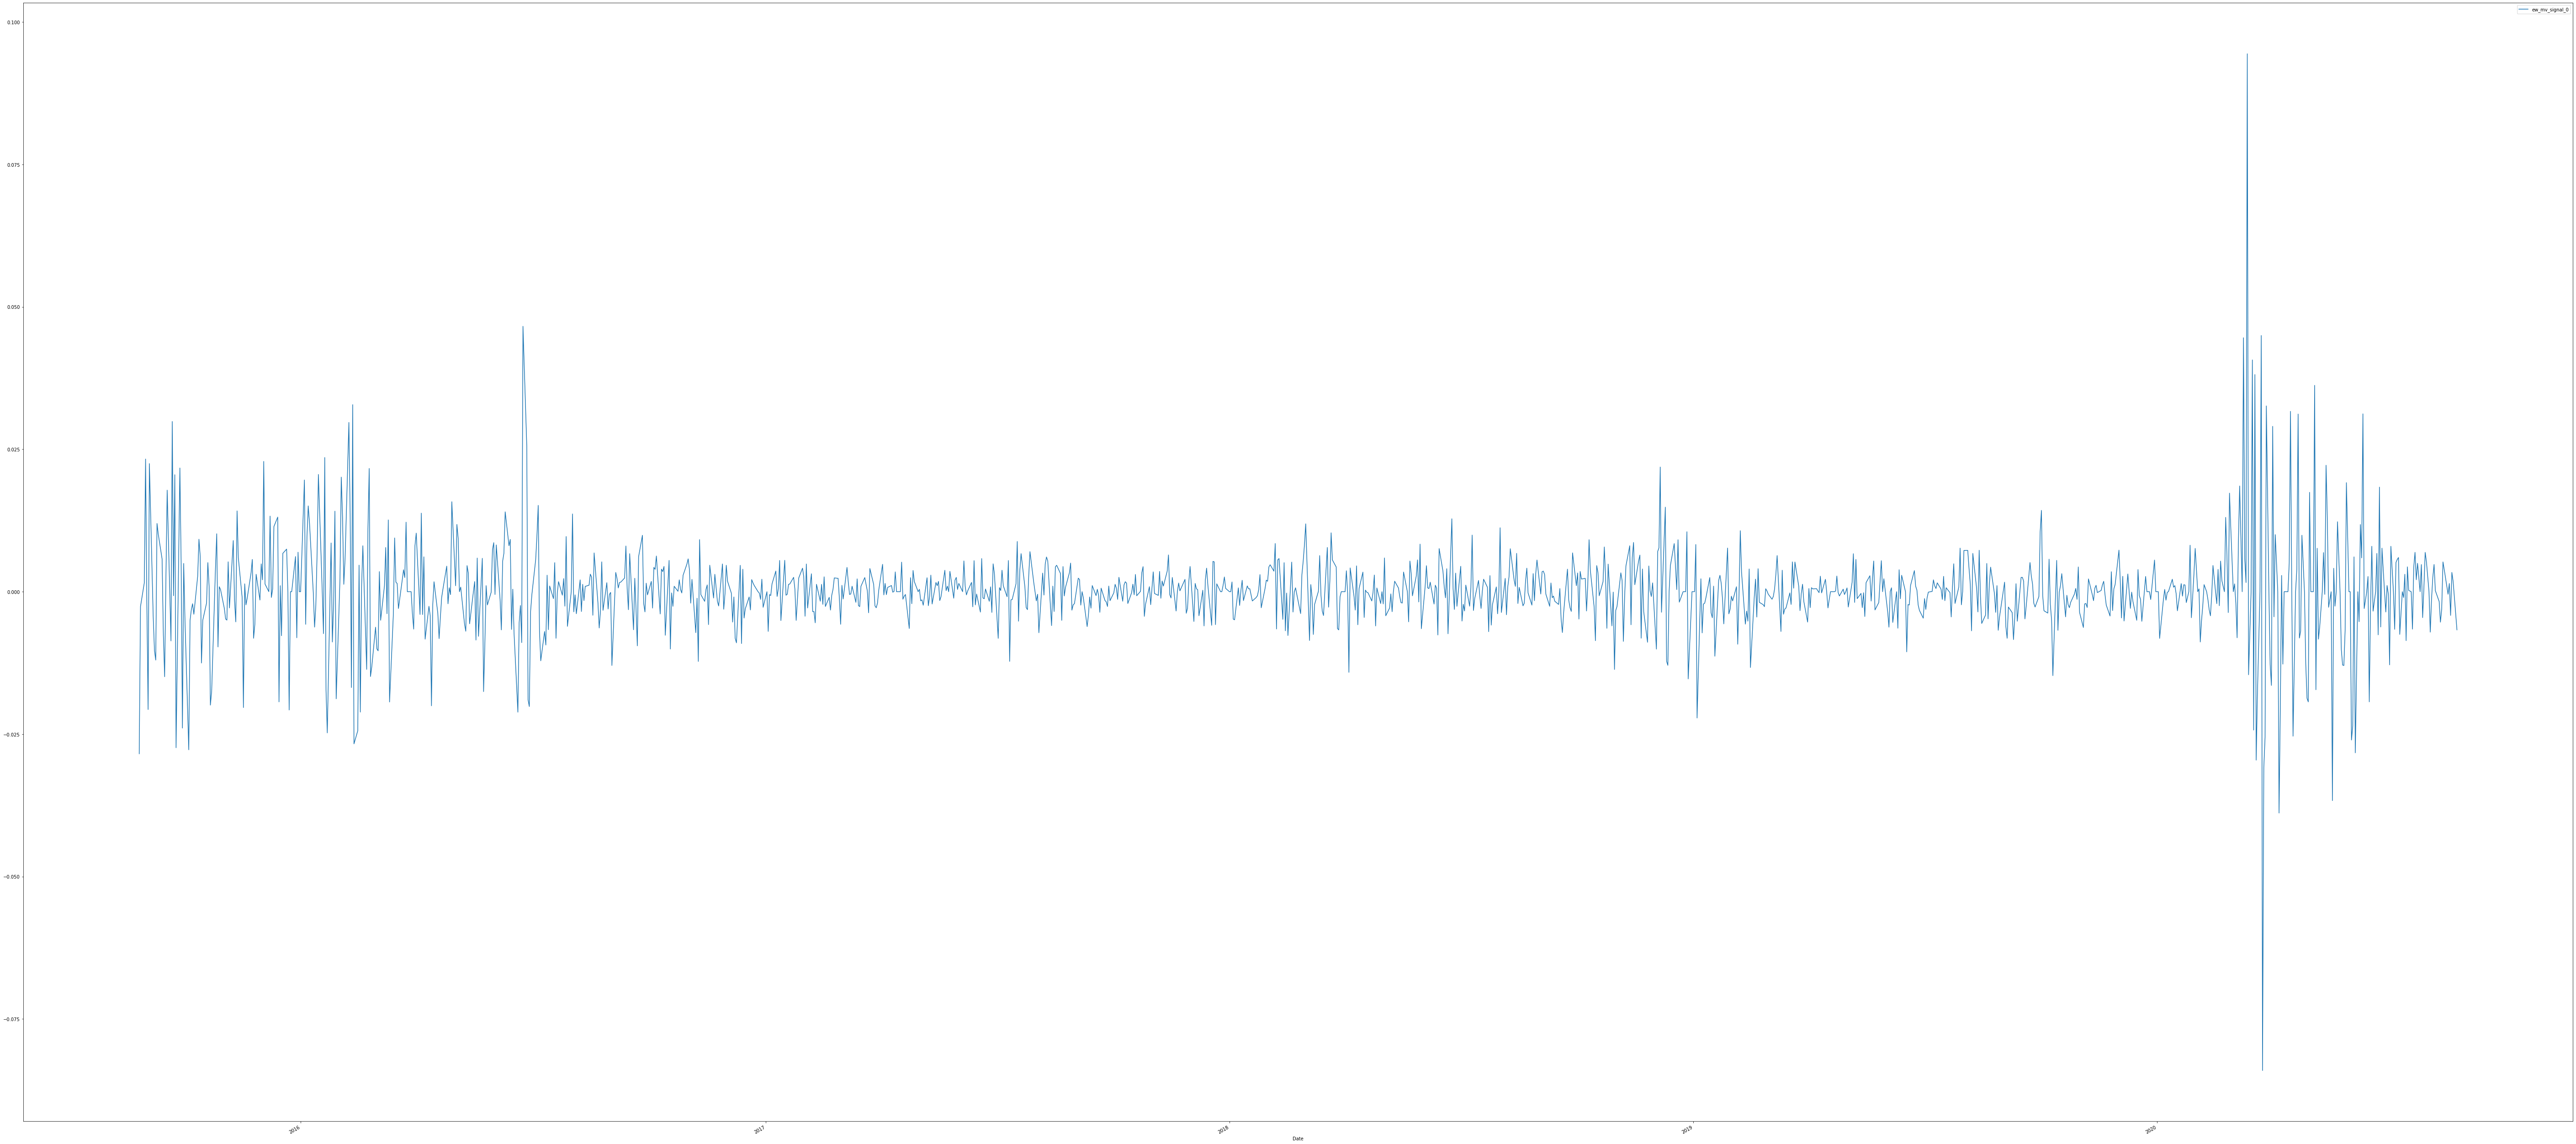

Ending Equity/ Profitability
Date
2020-08-24    1.051011
Name: ew_mv_signal_0, dtype: float64
count    1331.000000
mean        0.000072
std         0.008391
min        -0.084049
25%        -0.002796
50%         0.000000
75%         0.002866
max         0.094418
Name: ew_mv_signal_0, dtype: float64


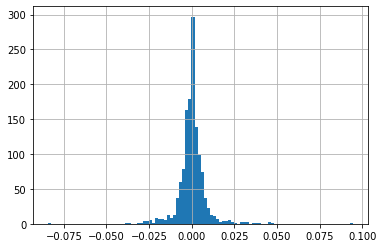

strategy alpha beta
                            OLS Regression Results                            
Dep. Variable:                      p   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                 1.109e+04
Date:                Tue, 25 Aug 2020   Prob (F-statistic):               0.00
Time:                        10:49:10   Log-Likelihood:                 5962.1
No. Observations:                1331   AIC:                        -1.192e+04
Df Residuals:                    1329   BIC:                        -1.191e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   7.53e-05

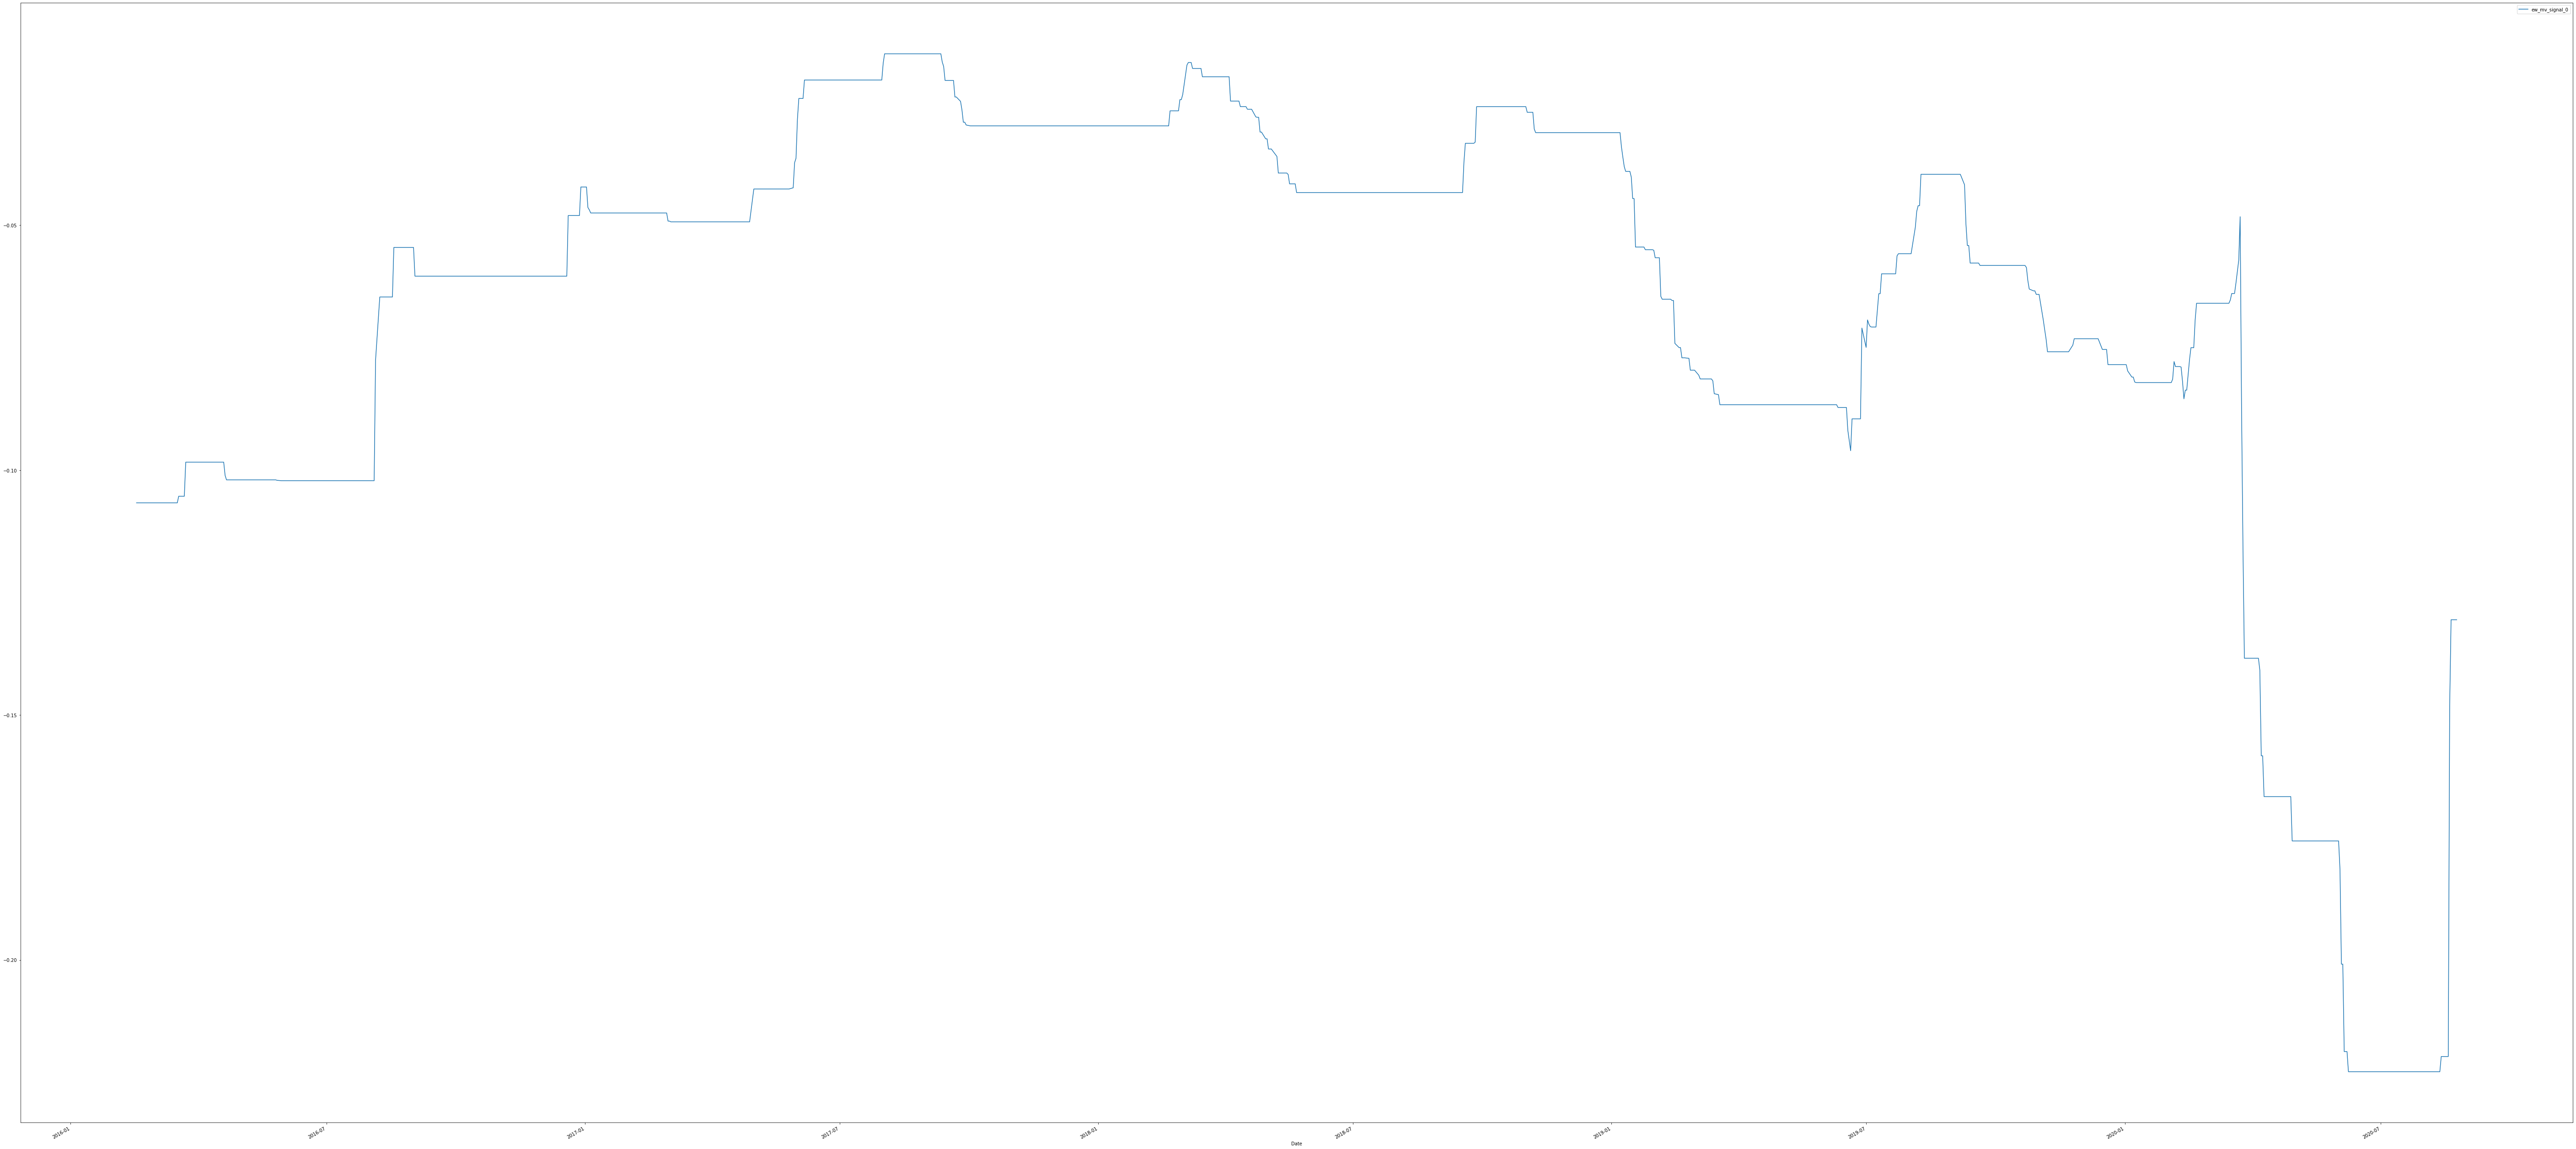

max dd: -0.2228358245503177
IR
Date
2015-12-31         NaN
2016-12-31   -2.362733
2017-12-31    2.761536
2018-12-31   -1.412201
2019-12-31    4.333464
2020-12-31   -6.216349
Freq: A-DEC, dtype: float64
-0.5792566333605091


Profit       1.051011
Alpha        0.000148
Beta        -0.722803
Daily Vol    0.008391
MaxDD       -0.222836
IR          -0.579257
dtype: float64

In [34]:
performance_analysis(ew_eq_curve_20_50_150['ew_mv_signal_0'], (port_ret['Short'] + 1).cumprod())

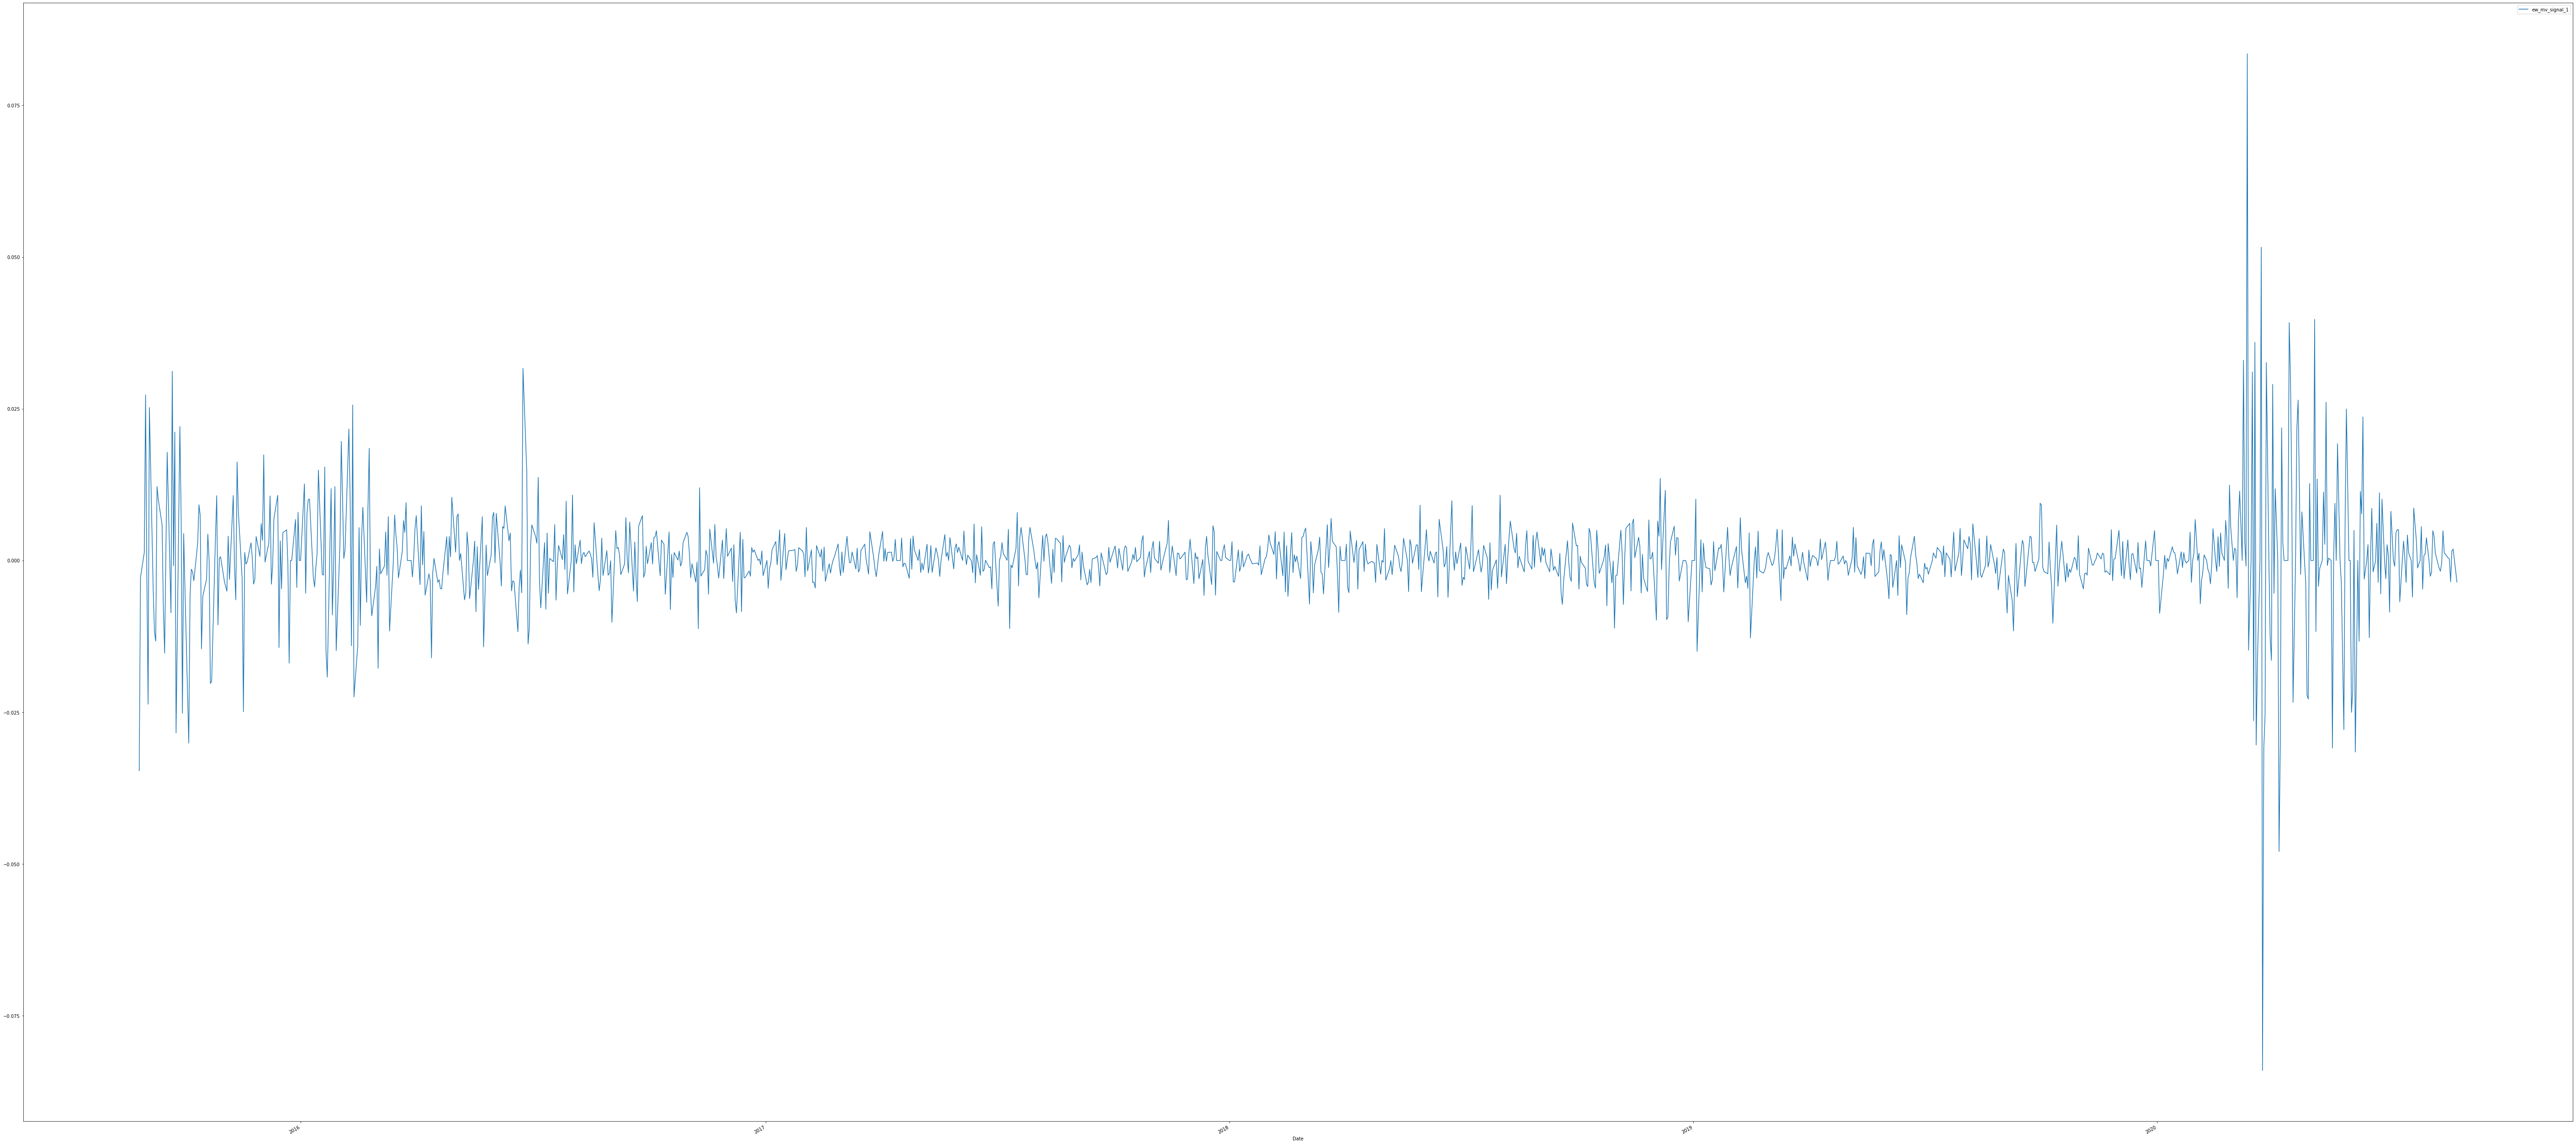

Ending Equity/ Profitability
Date
2020-08-24    1.37426
Name: ew_mv_signal_1, dtype: float64
count    1331.000000
mean        0.000269
std         0.007763
min        -0.084049
25%        -0.002188
50%         0.000000
75%         0.002662
max         0.083489
Name: ew_mv_signal_1, dtype: float64


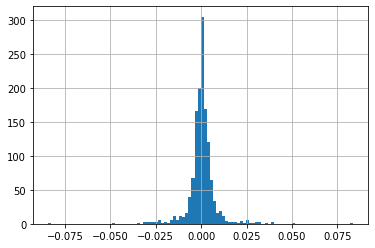

strategy alpha beta
                            OLS Regression Results                            
Dep. Variable:                      p   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     2631.
Date:                Tue, 25 Aug 2020   Prob (F-statistic):          2.05e-317
Time:                        10:49:15   Log-Likelihood:                 5305.0
No. Observations:                1331   AIC:                        -1.061e+04
Df Residuals:                    1329   BIC:                        -1.060e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000

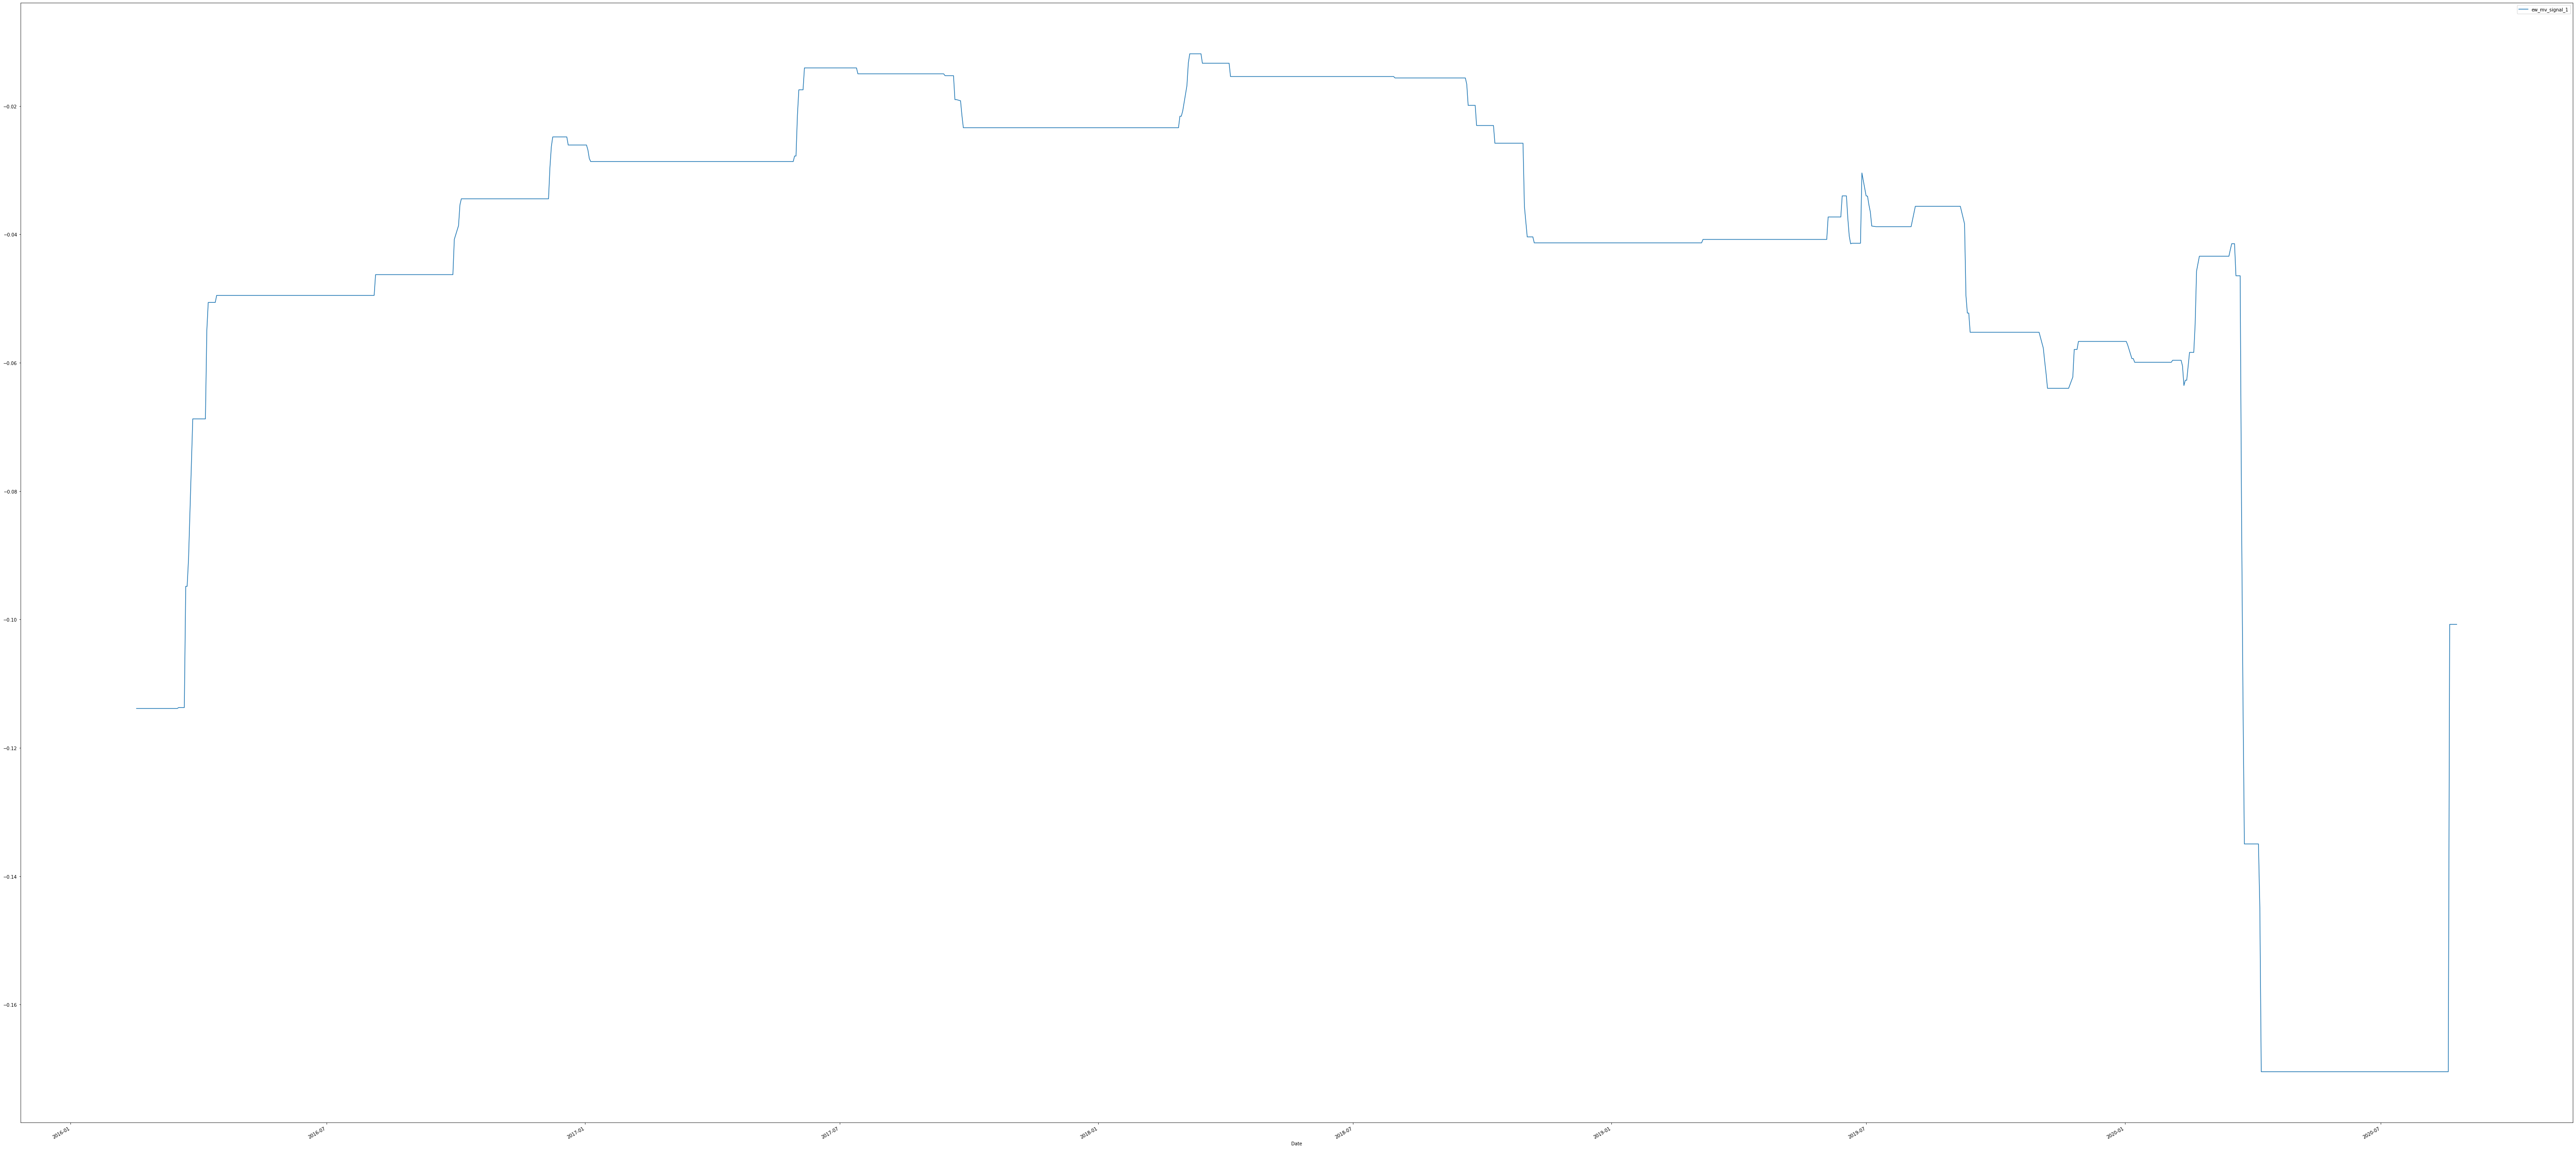

max dd: -0.17045841241625992
IR
Date
2015-12-31         NaN
2016-12-31   -2.372835
2017-12-31    9.116522
2018-12-31    1.356461
2019-12-31    4.899322
2020-12-31   -3.971503
Freq: A-DEC, dtype: float64
1.8055934784105367


Profit       1.374260
Alpha        0.000330
Beta        -0.576875
Daily Vol    0.007763
MaxDD       -0.170458
IR           1.805593
dtype: float64

In [35]:
performance_analysis(ew_eq_curve_20_50_150['ew_mv_signal_1'], (port_ret['Short'] + 1).cumprod())

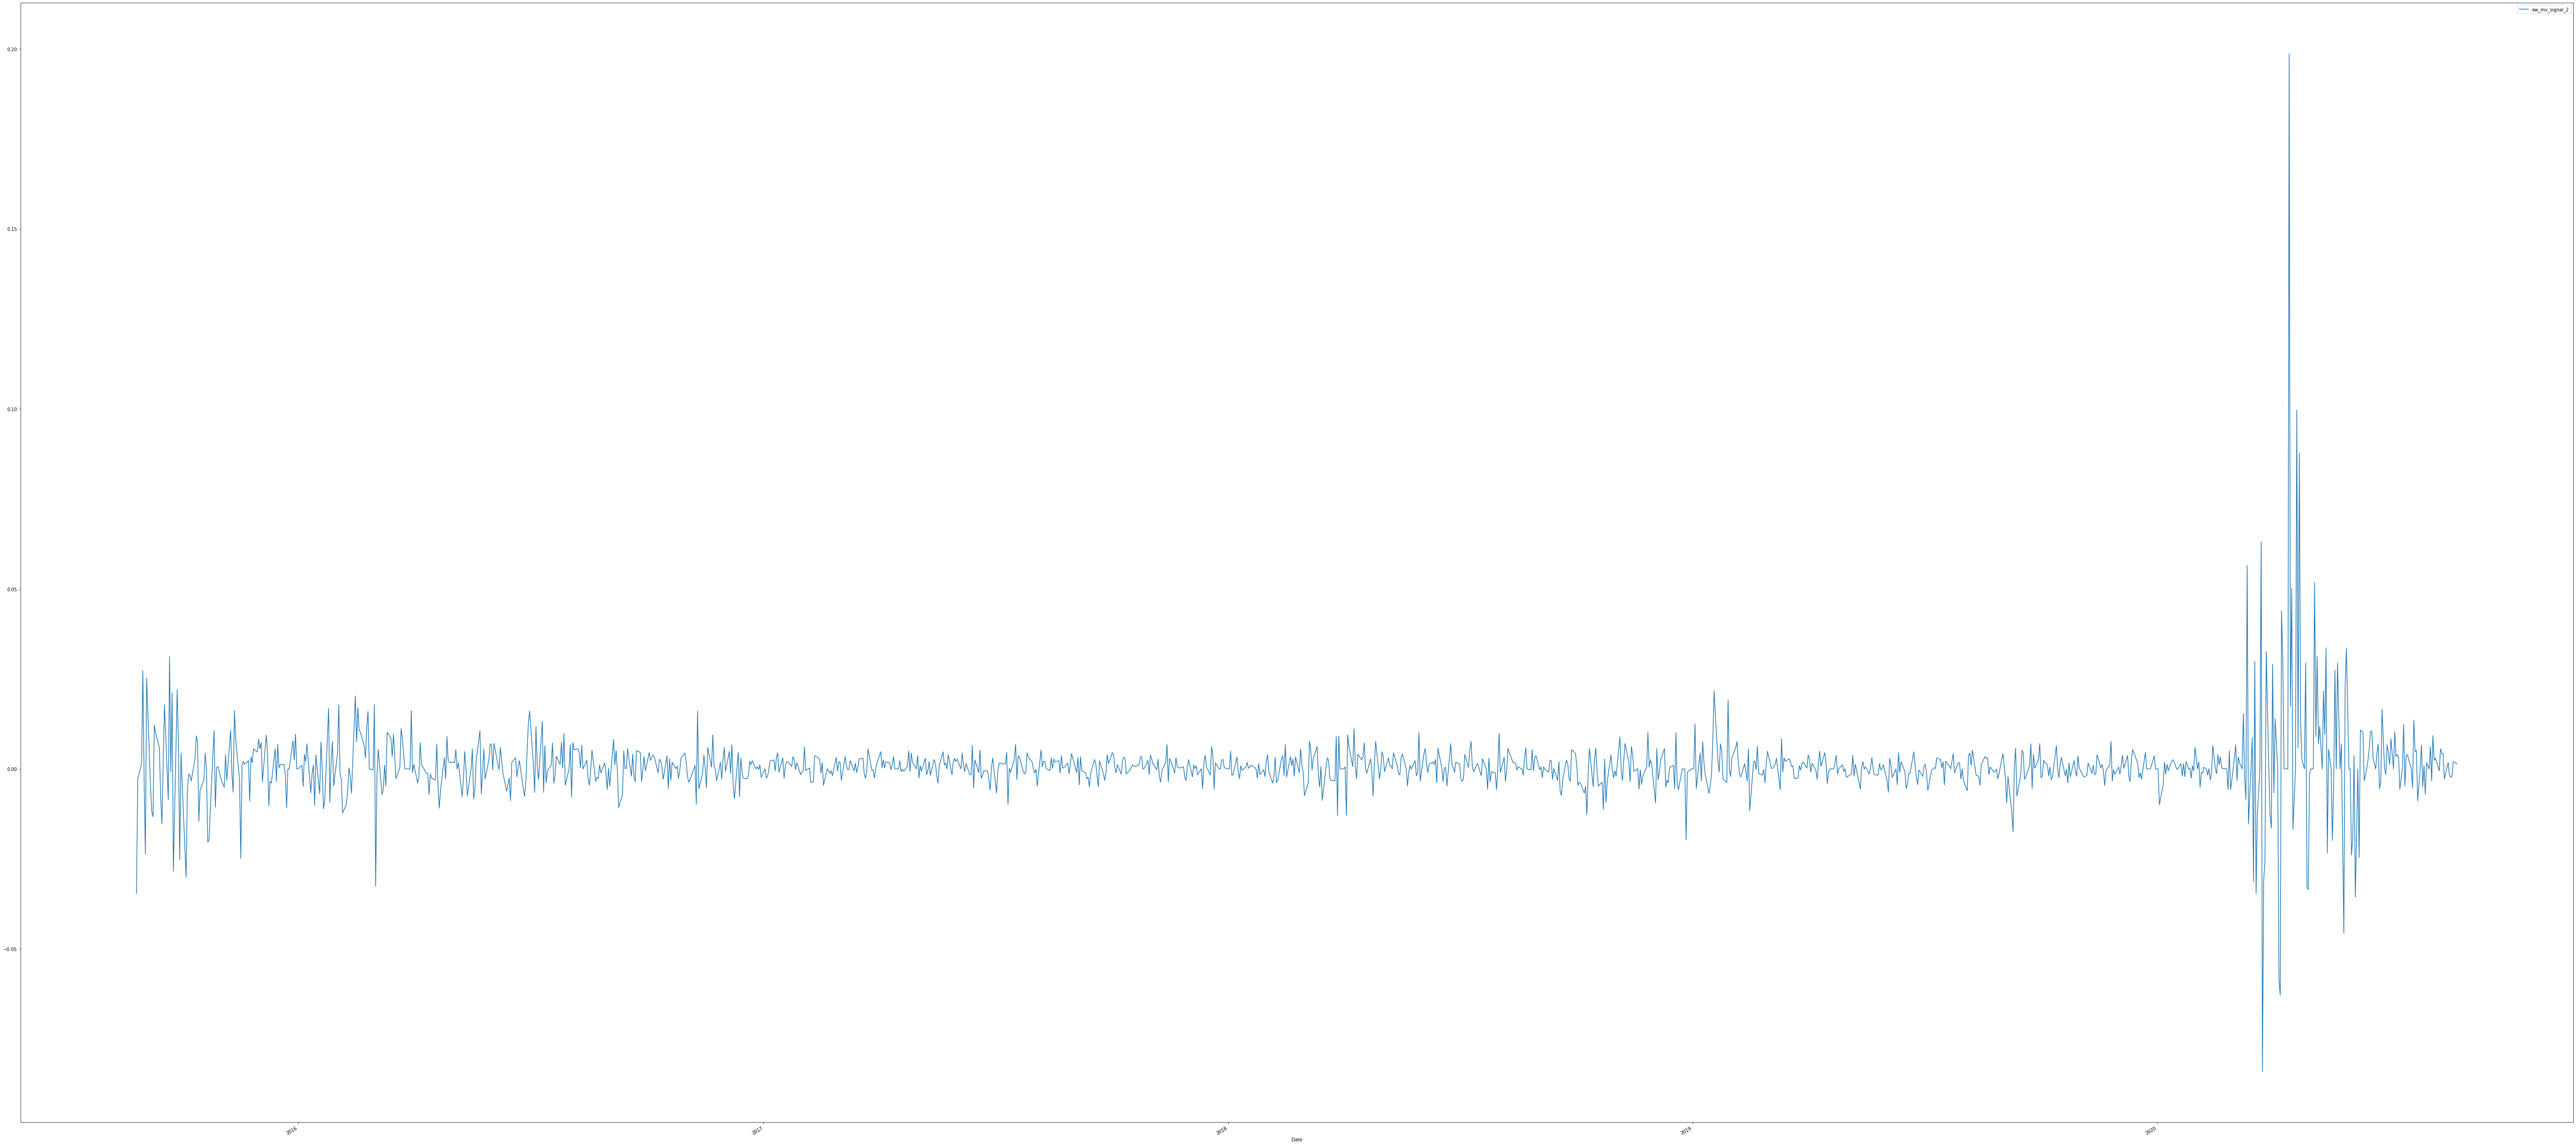

Ending Equity/ Profitability
Date
2020-08-24    2.683169
Name: ew_mv_signal_2, dtype: float64
count    1331.000000
mean        0.000795
std         0.010478
min        -0.084049
25%        -0.001922
50%         0.000210
75%         0.003026
max         0.198647
Name: ew_mv_signal_2, dtype: float64


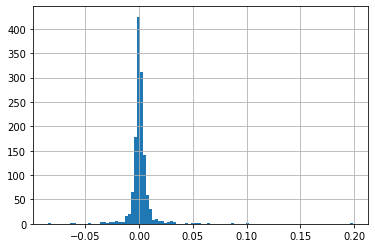

strategy alpha beta
                            OLS Regression Results                            
Dep. Variable:                      p   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     109.4
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           1.16e-24
Time:                        10:49:20   Log-Likelihood:                 4231.9
No. Observations:                1331   AIC:                            -8460.
Df Residuals:                    1329   BIC:                            -8449.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.000

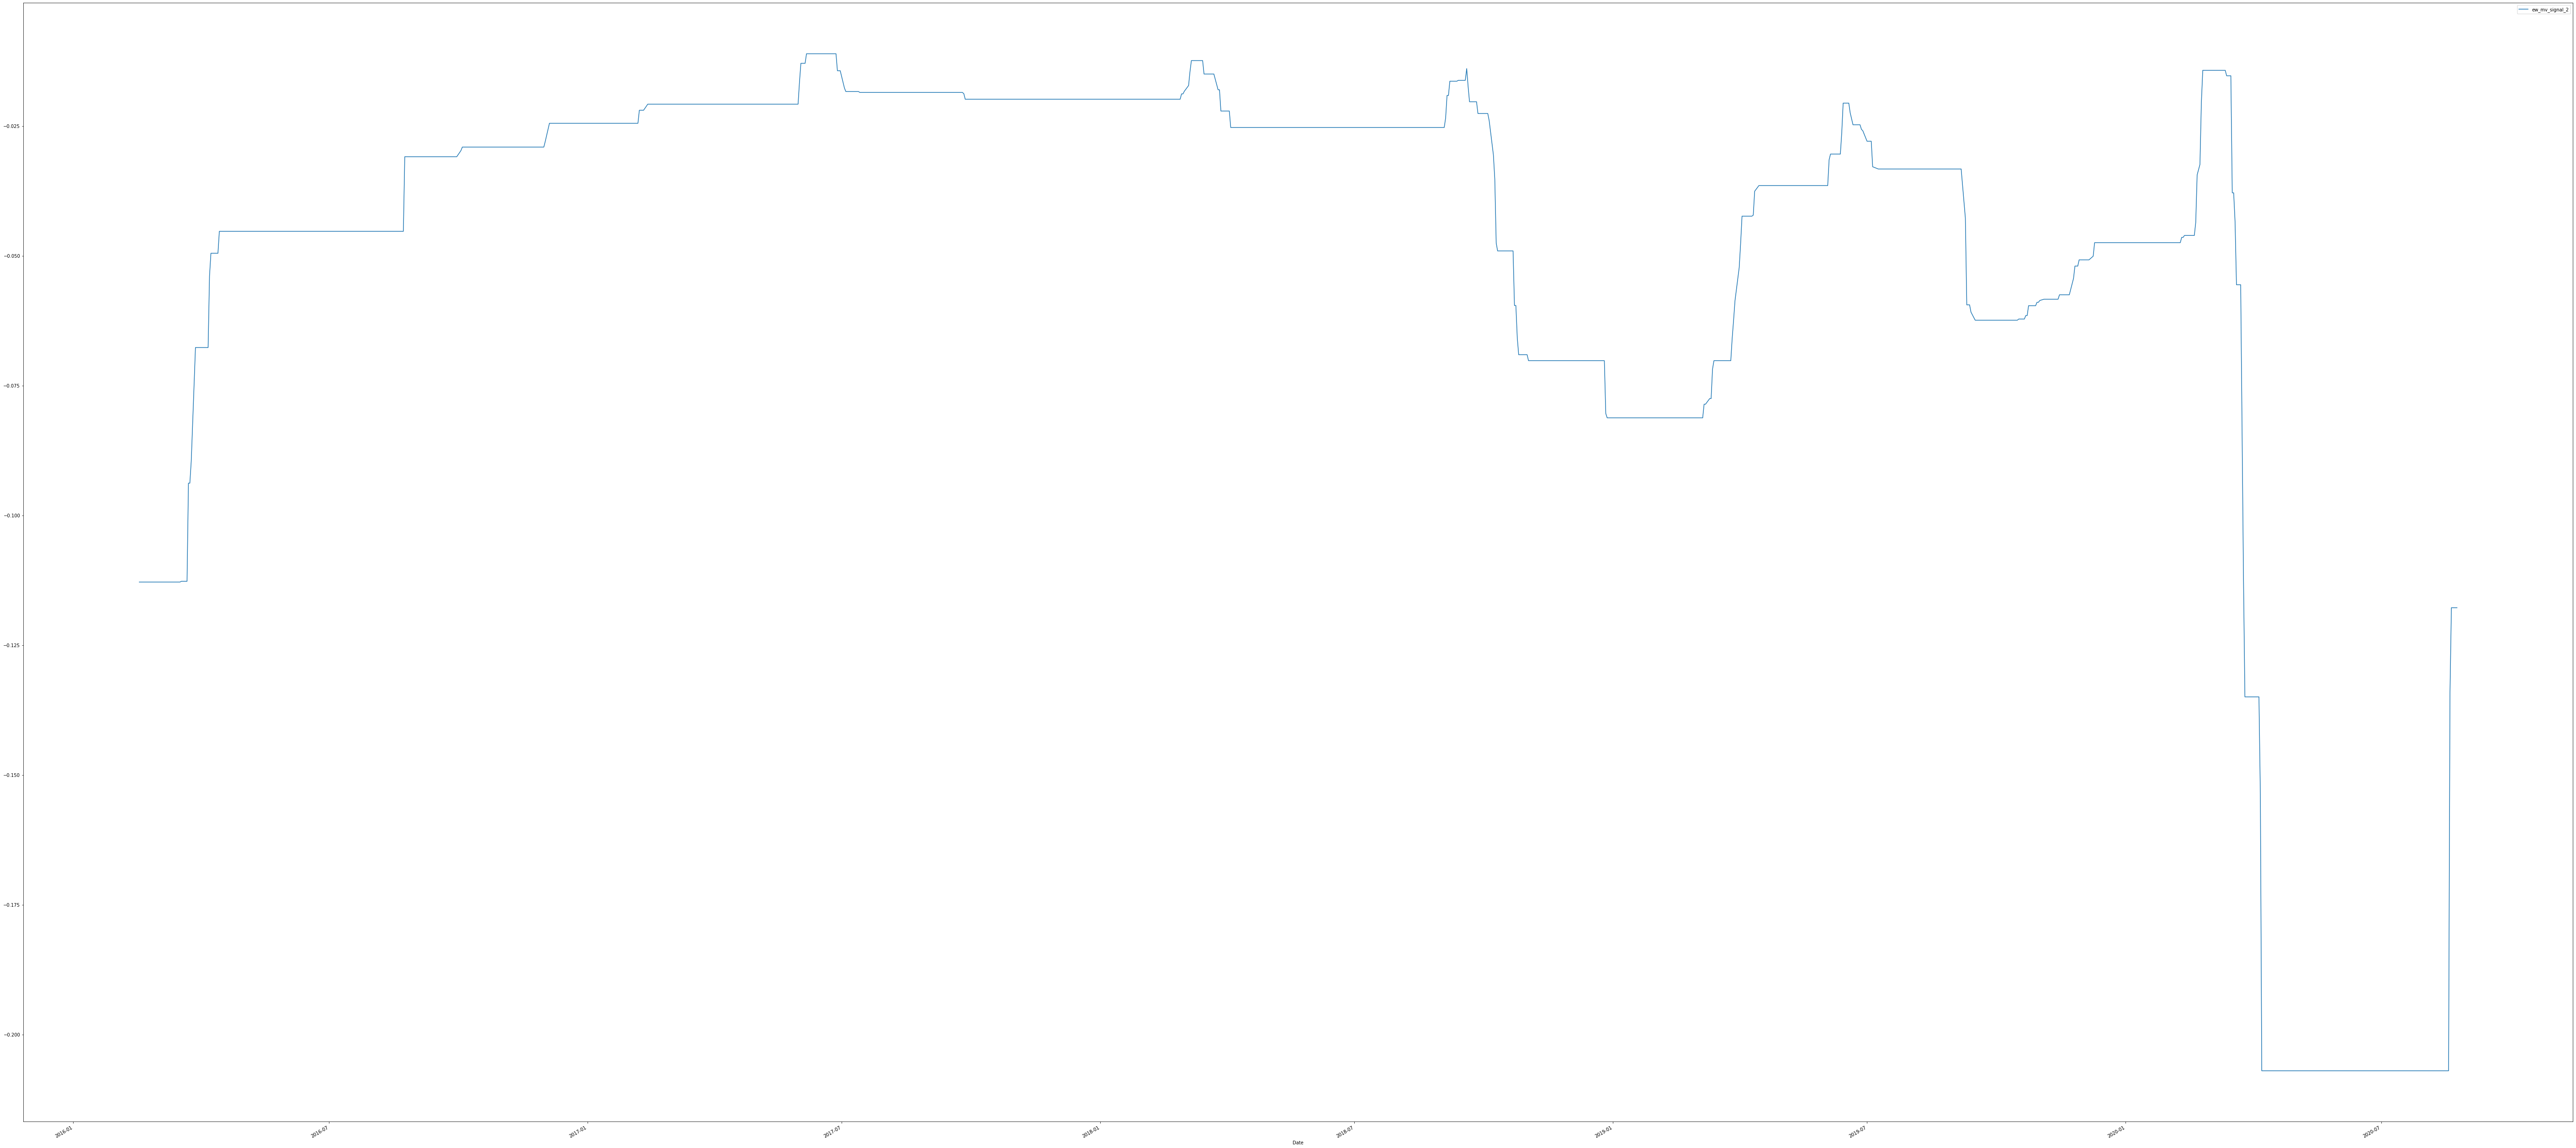

max dd: -0.20699854535149187
IR
Date
2015-12-31         NaN
2016-12-31   -1.962652
2017-12-31    6.497051
2018-12-31    2.495267
2019-12-31    4.633386
2020-12-31   -0.532126
Freq: A-DEC, dtype: float64
2.2261852816425662


Profit       2.683169
Alpha        0.000822
Beta        -0.263423
Daily Vol    0.010478
MaxDD       -0.206999
IR           2.226185
dtype: float64

In [36]:
performance_analysis(ew_eq_curve_20_50_150['ew_mv_signal_2'], (port_ret['Short'] + 1).cumprod())

In [37]:
def simple_mv_backtester(bt_signal_df, ret_df, min_periods=20, rules=1.645):
    
    bt_signal_df = bt_signal_df.where(bt_signal_df < rules,np.inf)
    bt_signal_df = bt_signal_df.where(bt_signal_df > rules,np.nan)
    bt_signal_df = bt_signal_df.replace(np.inf,1).dropna(how='all', axis=1).fillna(0)
    bt_holdings = bt_signal_df.shift(1)[today - pd.Timedelta('5Y'):]
    
    bt_ret_df = ret_df*bt_holdings
    bt_ret_df = ret_df.replace(-0,0)

    
    ## to avoid sigular matrix error due to zero prices returns, adding tiny tiny nois to the covariance matrix
    noised_bt_ret_df = bt_ret_df+0.00000001*np.random.rand(*bt_ret_df.shape)
    noised_bt_ret_df = noised_bt_ret_df.dropna(how='all', axis=1).fillna(0)
    cov_df = noised_bt_ret_df.expanding( min_periods=min_periods).cov().dropna(axis=0) # window=min_periods,
    

    w_MV = cov_df.groupby(level=0, axis=0).apply(compute_MV_weights).apply(pd.Series)
    
    w_MV.columns = cov_df.columns
    
    bt_port_ret = (bt_ret_df.mul(w_MV, axis='index').fillna(0)).sum(axis=1) 
    bt_mv_eq_curve = (bt_port_ret.fillna(0)+1).cumprod()
    

    return bt_port_ret, bt_mv_eq_curve
    
    
    

In [38]:
mv_port_ret_2, mv_eq_curv_2 = simple_mv_backtester(combined_signal, ret_df, rules=2)


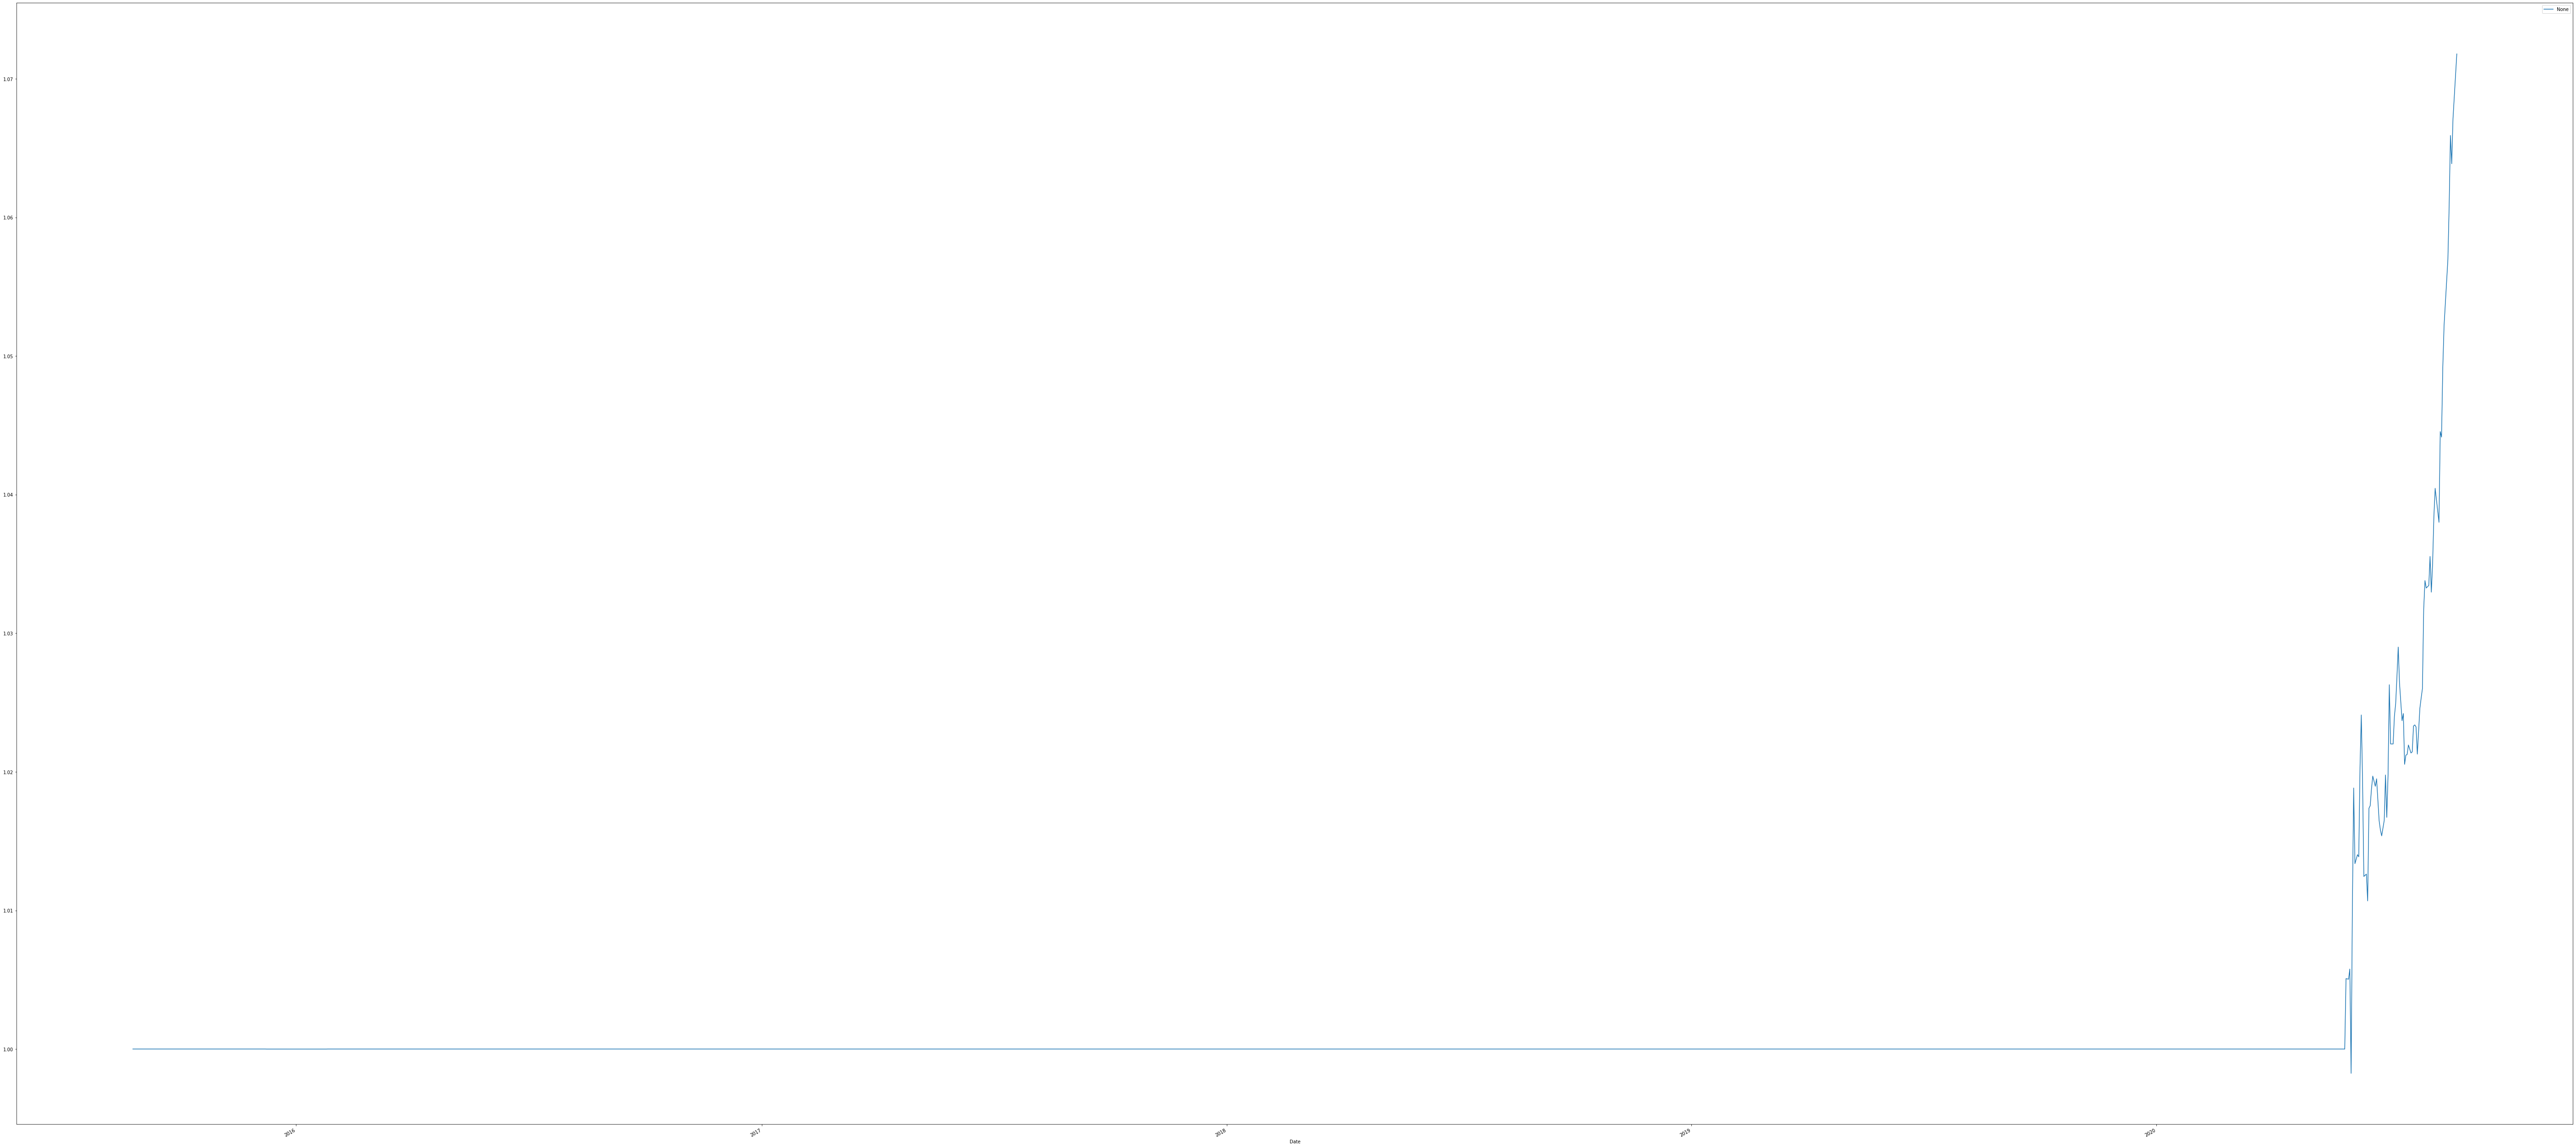

In [39]:
mv_eq_curv_2.plot(figsize=(100,50), legend=True)
plt.show()
plt.close()

In [40]:
ew_eq_curve_20_50_150['MV_port_2'] = mv_eq_curv_2

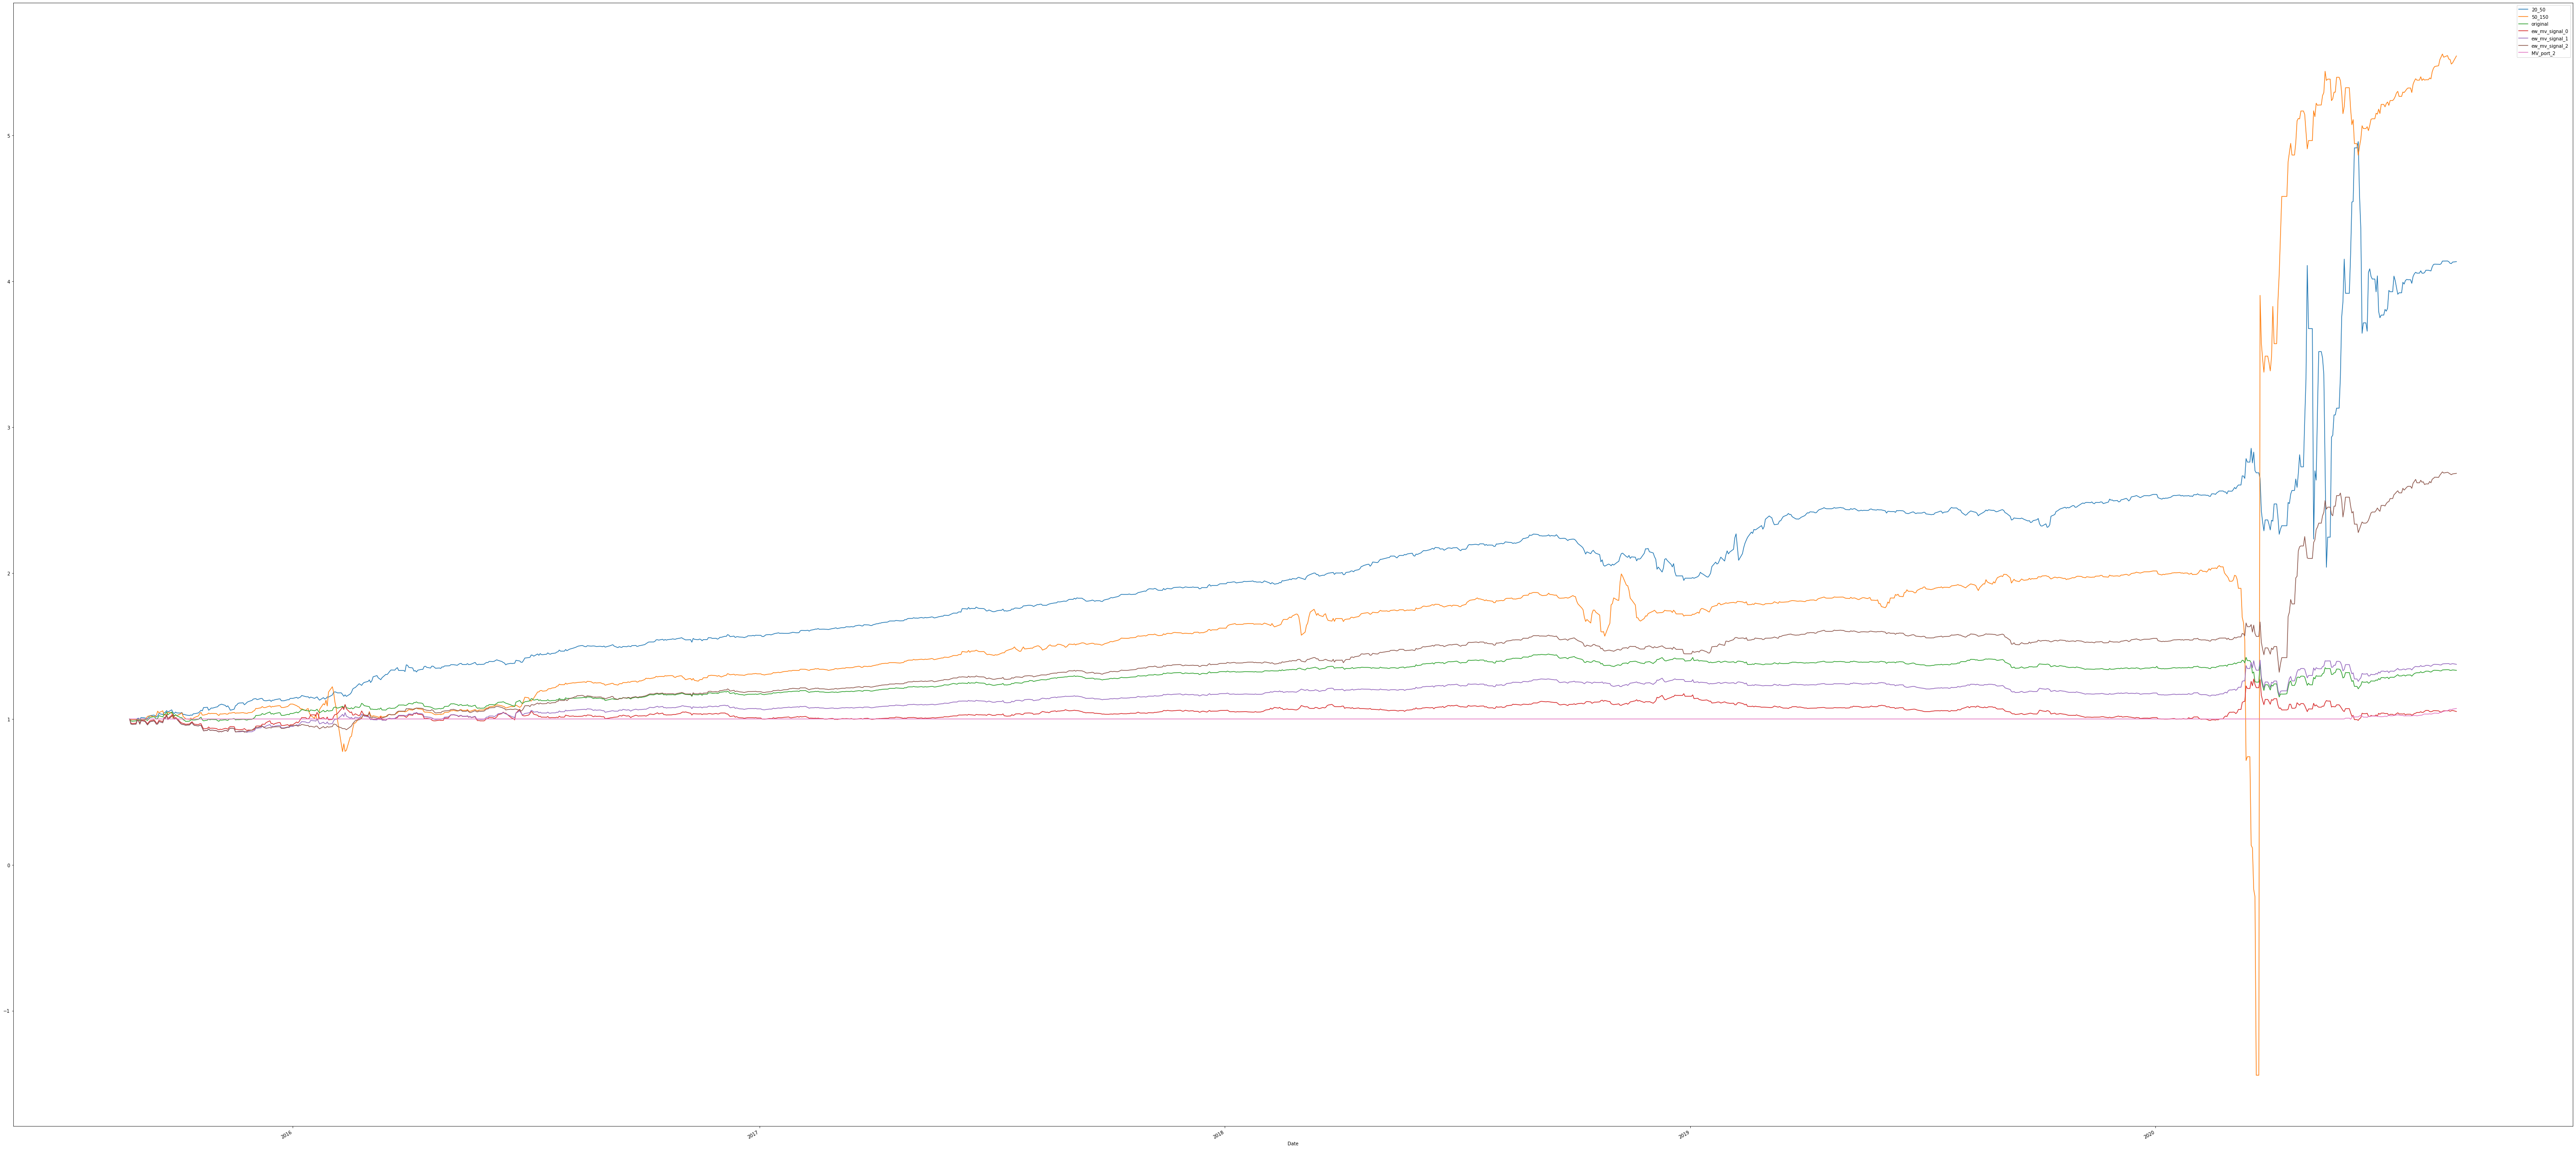

In [41]:
ew_eq_curve_20_50_150.plot(figsize=(100,50), legend=True)
plt.show()
plt.close()

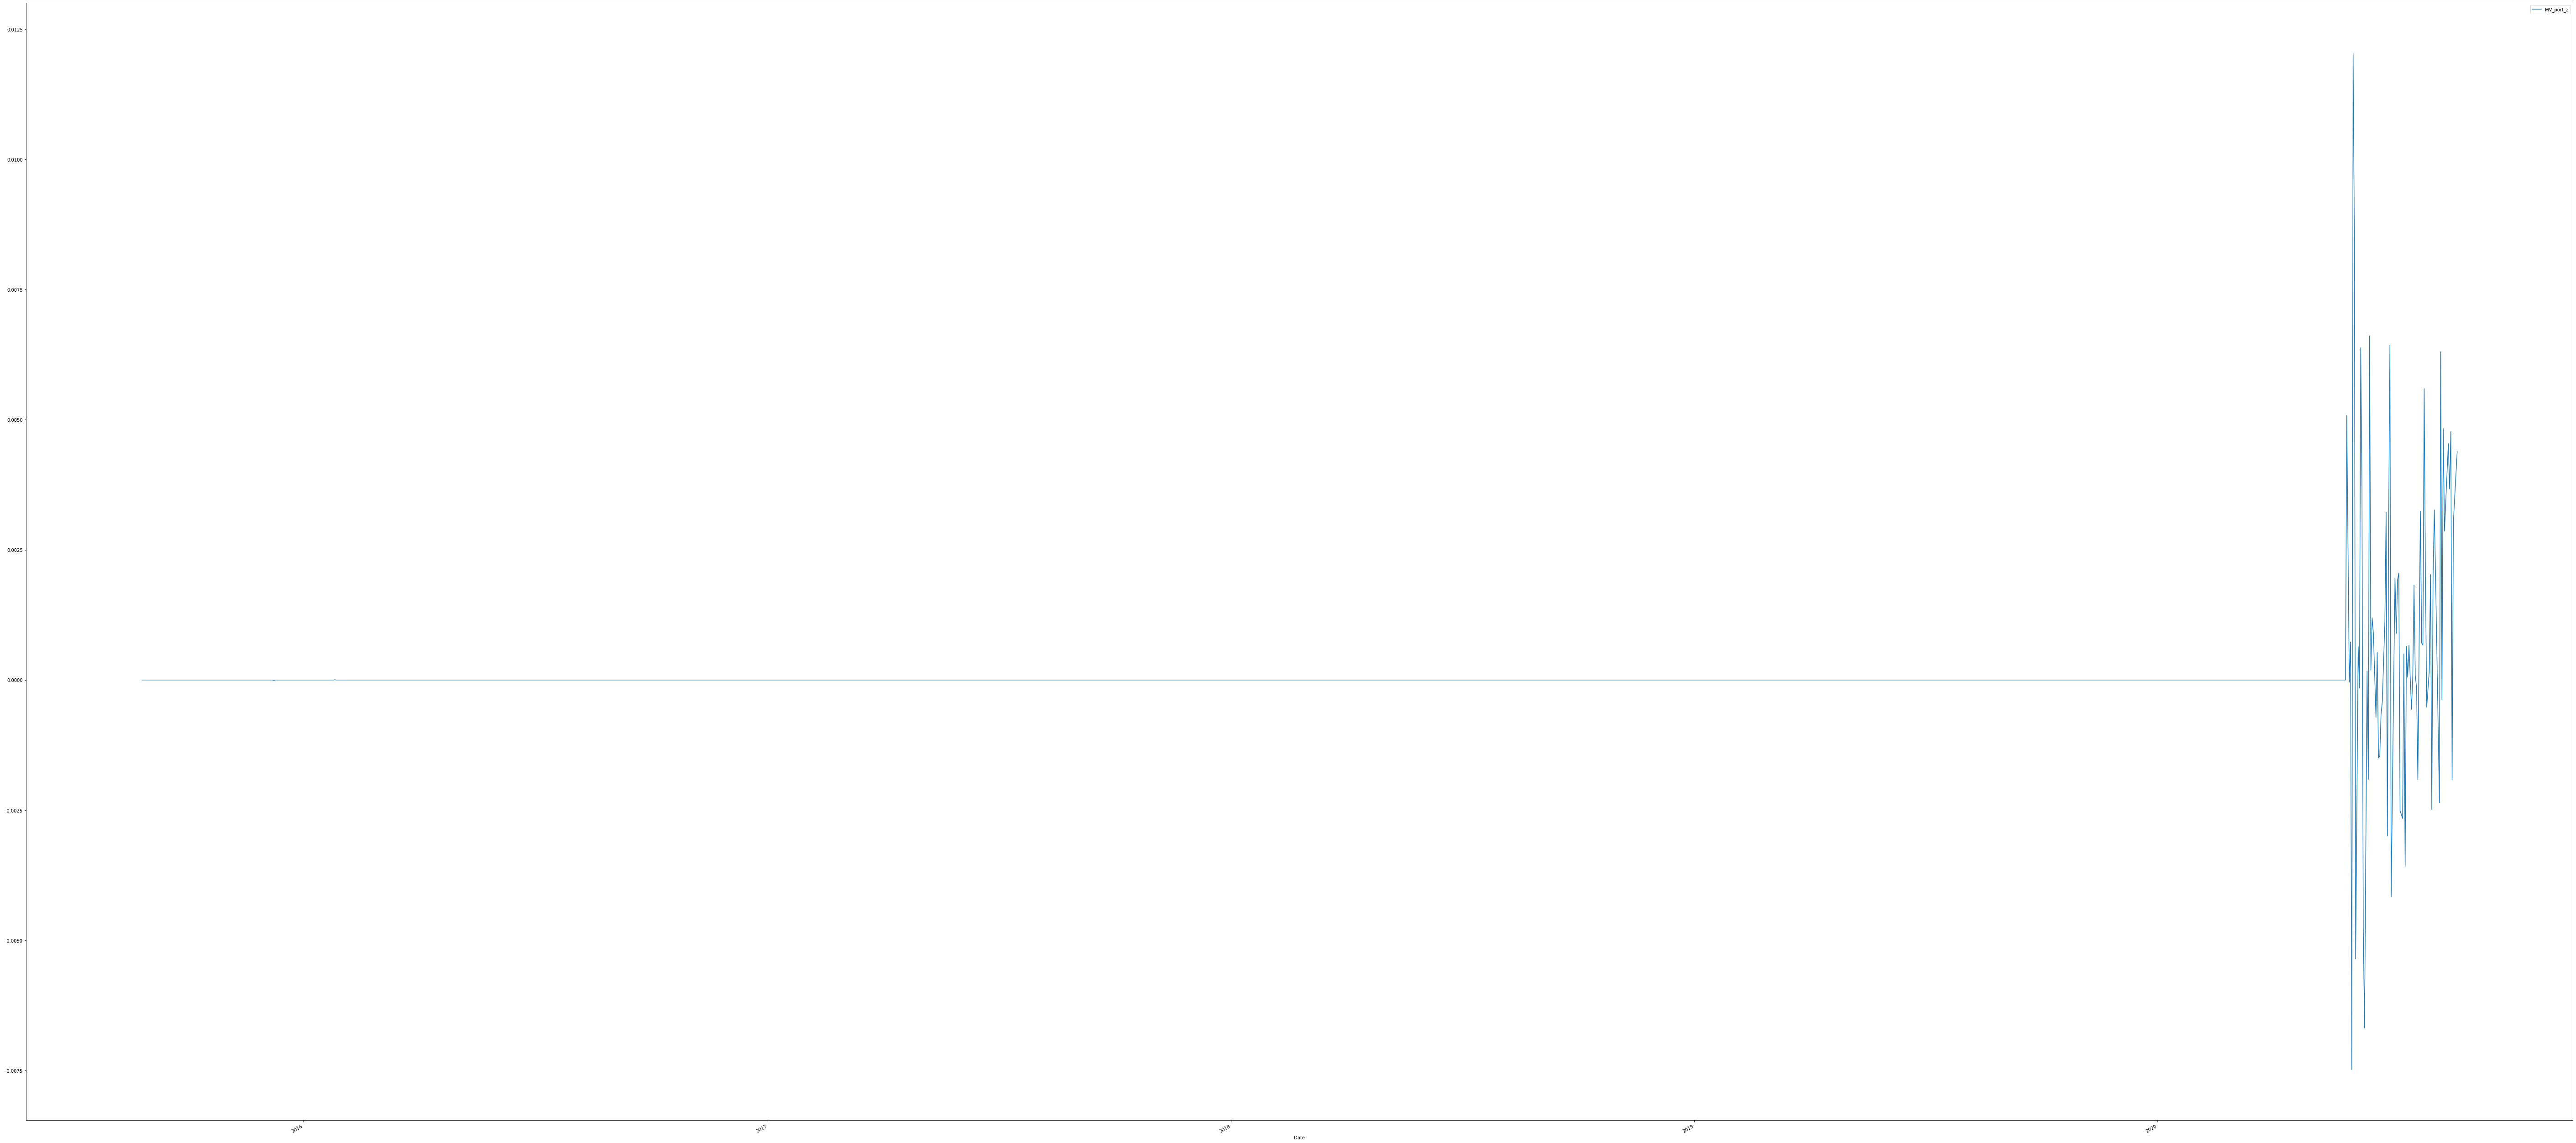

Ending Equity/ Profitability
Date
2020-08-24    1.071792
Name: MV_port_2, dtype: float64
count    1.331000e+03
mean     5.242058e-05
std      8.127733e-04
min     -7.483266e-03
25%     -8.347212e-10
50%     -3.587708e-11
75%      6.431883e-10
max      1.203014e-02
Name: MV_port_2, dtype: float64


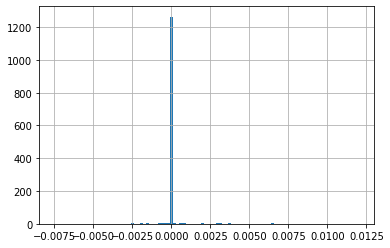

strategy alpha beta
                            OLS Regression Results                            
Dep. Variable:                      p   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.369
Date:                Tue, 25 Aug 2020   Prob (F-statistic):              0.124
Time:                        10:53:30   Log-Likelihood:                 7583.2
No. Observations:                1331   AIC:                        -1.516e+04
Df Residuals:                    1329   BIC:                        -1.515e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.209e-05   2.23e-05

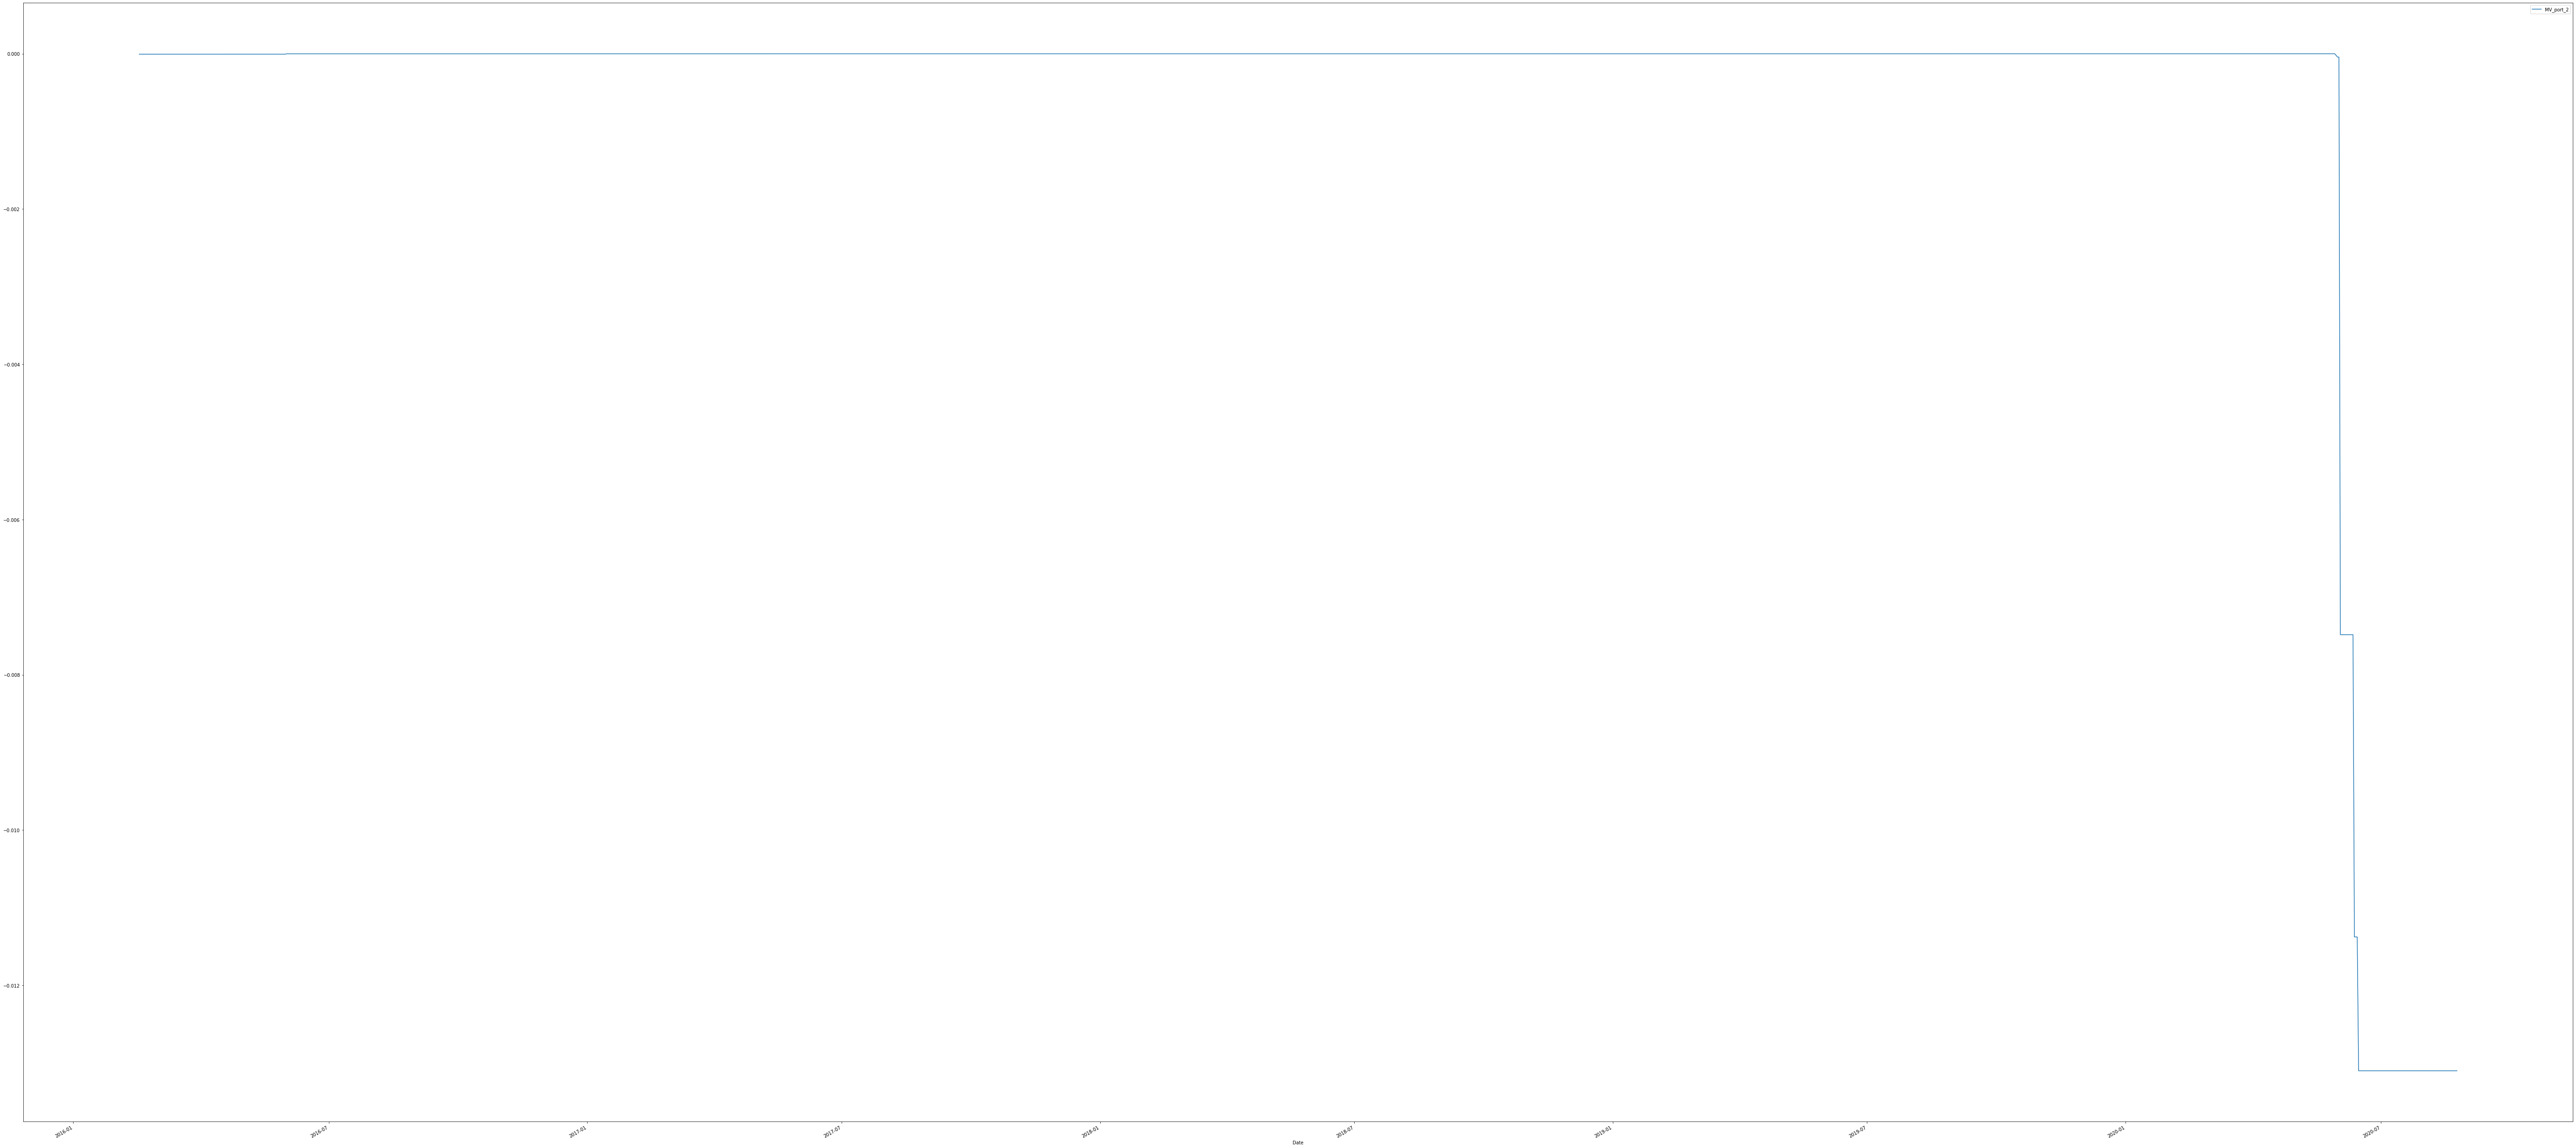

max dd: -0.013100714198406527
IR
Date
2015-12-31             NaN
2016-12-31   -2.256152e+04
2017-12-31    2.140046e+04
2018-12-31   -1.161760e+07
2019-12-31    5.165020e+07
2020-12-31   -1.510684e+01
Freq: A-DEC, dtype: float64
8006284.746913681


Profit       1.071792e+00
Alpha        5.209223e-05
Beta         3.125150e-03
Daily Vol    8.127733e-04
MaxDD       -1.310071e-02
IR           8.006285e+06
dtype: float64

In [42]:
performance_analysis(ew_eq_curve_20_50_150['MV_port_2'], (port_ret['Short'] + 1).cumprod())

In [43]:
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())

['builtins',
 'builtins',
 'statsmodels.api',
 'matplotlib.pyplot',
 'seaborn',
 'scipy.stats.mstats',
 'pandas',
 'numpy',
 'types']